In [1]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()
import pandas as pd
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib
import matplotlib.pyplot as plt
import time
import os
import math
from math import exp, pi,sin,cos


np.random.seed(1)
tf.set_random_seed(1)
###########设置定义域范围

a=0
b=1
c=0
d=1
class PhysicsInformedNN:
   # Initialize the class
    def __init__(self, layers_U, layers_V1,layers_V2,layers_V3,layers_V4,layers_V5,layers_W1,layers_W2,layers_W3,layers_W4,layers_W5,layers_LM,  x_range, t_range, f, num_train_tps):

        # Initialize NNs
        self.layers_U = layers_U
        self.weights_U, self.biases_U, self.adaps_U = self.initialize_NN(layers_U)
        self.layers_V1 = layers_V1
        self.weights_V1, self.biases_V1, self.adaps_V1 = self.initialize_NN(layers_V1)
        self.layers_V2 = layers_V2
        self.weights_V2, self.biases_V2, self.adaps_V2 = self.initialize_NN(layers_V2)
        self.layers_V3 = layers_V3
        self.weights_V3, self.biases_V3, self.adaps_V3 = self.initialize_NN(layers_V3)
        self.layers_V4 = layers_V4
        self.weights_V4, self.biases_V4, self.adaps_V4 = self.initialize_NN(layers_V4)
        self.layers_V5 = layers_V5
        self.weights_V5, self.biases_V5, self.adaps_V5 = self.initialize_NN(layers_V5)
        self.layers_W1 = layers_W1
        self.weights_W1, self.biases_W1, self.adaps_W1 = self.initialize_NN(layers_W1)
        self.layers_W2 = layers_W2
        self.weights_W2, self.biases_W2, self.adaps_W2 = self.initialize_NN(layers_W2)
        self.layers_W3 = layers_W3
        self.weights_W3, self.biases_W3, self.adaps_W3 = self.initialize_NN(layers_W3)
        self.layers_W4 = layers_W4
        self.weights_W4, self.biases_W4, self.adaps_W4 = self.initialize_NN(layers_W4)
        self.layers_W5 = layers_W5
        self.weights_W5, self.biases_W5, self.adaps_W5 = self.initialize_NN(layers_W5)
        self.layers_LM = layers_LM
        self.weights_LM, self.biases_LM, self.adaps_LM = self.initialize_NN(layers_LM)
        # Parameters
        self.t_range =t_range
        self.x_range = x_range
        self.lb = np.array([ x_range[0],t_range[0]])
        self.ub = np.array([ x_range[1],t_range[1]])

        # Output file
        self.f = f

        self.tx_tf = tf.placeholder(tf.float32, shape=[None, 1])
        self.xx_tf = tf.placeholder(tf.float32, shape=[None, 1])
        self.ux_star_tf = tf.placeholder(tf.float32, shape=[None, 1])
        # Test Points                           ######################测试点
        self.t_test_tf = tf.placeholder(tf.float32, shape=[None, 1])
        self.x_test_tf = tf.placeholder(tf.float32, shape=[None, 1])

        # Generate Training and Testing Points  ########################生成训练和测试点
        self.generateTrain(num_train_tps)

        # Physics
        # Interior (IDE)  #############PDE
        self.gf,self.f, self.e1, self.e2,self.e3, self.e4,self.e5, self.e6,self.e7, self.e8,self.e9, self.e10,self.Ux, self.V1x,self.V2x,self.V3x,self.V4x,self.V5x,\
        self.W1x,self.W2x,self.W3x,self.W4x,self.W5x,self.U_xx,self.U_tx,self.U_ttx,self.V1_xx,self.V2_xx,self.V3_xx,self.V4_xx,self.V5_xx,\
        self.W1_tx,self.W2_tx,self.W3_tx,self.W4_tx,self.W5_tx, self.LMx, self.LM_xx, self.LM_tx= self.pinn(self.tx_tf,self.xx_tf)
       
        self.gf,self.f, self.e1, self.e2,self.e3, self.e4,self.e5, self.e6,self.e7, self.e8,self.e9, self.e10,self.Uf, self.V1f,self.V2f,self.V3f,self.V4f,self.V5f,\
        self.W1f,self.W2f,self.W3f,self.W4f,self.W5f,self.U_xf,self.U_tf,self.U_ttf,self.V1_xf,self.V2_xf,self.V3_xf,self.V4_xf,self.V5_xf,\
        self.W1_tf,self.W2_tf,self.W3_tf,self.W4_tf,self.W5_tf,self.LMf, self.LM_xf, self.LM_tf= self.pinn(self.tt,self.xf)
        #chushi
        _,_, _,_,_,_, _,_,_, _,_, _, self.Ui, self.V1i,self.V2i,self.V3i,self.V4i,self.V5i,self.W1i,self.W2i,self.W3i,self.W4i,self.W5i,self.U_xi,self.U_ti,self.U_tti,\
        self.V1_xi,self.V2_xi,self.V3_xi,self.V4_xi,self.V5_xi,self.W1_ti,self.W2_ti,self.W3_ti,self.W4_ti,self.W5_ti,self.LMi, self.LM_xi, self.LM_ti = self.pinn(self.ti,self.xi)
        _,_, _,_,_,_, _,_,_, _,_, _, self.Ub, self.V1b,self.V2b,self.V3b,self.V4b, self.V5b,self.W1b,self.W2b,self.W3b,self.W4b,self.W5b, self.U_xb, self.U_tb, \
        self.U_ttb, self.V1_xb,self.V2_xb,self.V3_xb,self.V4_xb, self.V5_xb,self.W1_tb,self.W2_tb,self.W3_tb,self.W4_tb,self.W5_tb,self.LMb, self.LM_xb, self.LM_tb= self.pinn(self.tb, self.xb)
        _, _, _, _, _, _, _, _,_, _, _, _,self.Ub2, self.V1b2, self.V2b2, self.V3b2,self.V4b2, self.V5b2, self.W1b2, self.W2b2, self.W3b2, self.W4b2, self.W5b2,\
        self.U_xb2, self.U_tb2, self.U_ttb2, self.V1_xb2, self.V2_xb2, self.V3_xb2, self.V4_xb2,self.V5_xb2,self.W1_tb2, self.W2_tb2, self.W3_tb2, self.W4_tb2, self.W5_tb2,self.LMb2, self.LM_xb2, self.LM_tb2  \
            = self.pinn( self.tb2, self.xb2)
        # Test
        _, self.f_test,self.e1_test, self.e2_test,self.e3_test, self.e4_test,self.e5_test, self.e6_test,self.e7_test,self.e8_test,self.e9_test,self.e10_test,\
        self.U_test, self.V1_test, self.V2_test, self.V3_test,self.V4_test,self.V5_test, self.W1_test,self.W2_test,self.W3_test,self.W4_test, self.W5_test,\
        self.U_x_test, self.U_t_test, self.U_tt_test, self.V1_x_test,self.V2_x_test,self.V3_x_test,self.V4_x_test,self.V5_x_test, self.W1_t_test,self.W2_t_test,\
        self.W3_t_test,self.W4_t_test,self.W5_t_test,self.LM_test, self.LM_x_test, self.LM_t_test=self.pinn(self.t_test_tf,self.x_test_tf)

        # Interior (IDE)
      
        # 初始条件和边界条件
        self.loss_U = tf.reduce_mean((self.Ux - self.ux_star_tf) ** 2)
        self.loss_LM = tf.reduce_mean((self.LM_xf - 0 * self.Uf) ** 2)+tf.reduce_mean((self.LM_tf - 0 * self.Uf) ** 2)
        self.loss_f = tf.reduce_mean((self.gf+(2*self.tt**3*(self.tt-1)**2*(self.tt+1)**2)*(self.V1f-self.V2f+self.V3f-self.V4f+self.V5f)+self.U_xf-self.U_tf- self.LMf*self.Uf-self.U_ttf) ** 2)
        self.loss_e1 = tf.reduce_mean((self.V1_xf - self.W1f) ** 2)
        self.loss_e2= tf.reduce_mean((self.V2_xf -self.tt**2*self.xf**2*self.W2f*0.5) ** 2)
        self.loss_e3 = tf.reduce_mean((self.V3_xf - (self.tt ** 4 * self.xf ** 4 * self.W3f)/24) ** 2)
        self.loss_e4 = tf.reduce_mean((self.V4_xf - (self.tt ** 6 * self.xf ** 6 * self.W4f) / 720) ** 2)
        self.loss_e5 = tf.reduce_mean((self.V5_xf - (self.tt ** 8 * self.xf ** 8 * self.W5f) / 40320) ** 2)
        self.loss_e6 = tf.reduce_mean((self.W1_tf - self.Uf ) ** 2)
        self.loss_e7 = tf.reduce_mean((self.W2_tf - self.tt**2*self.Uf) ** 2)
        self.loss_e8 = tf.reduce_mean((self.W3_tf - self.tt**4*self.Uf) ** 2)
        self.loss_e9 = tf.reduce_mean((self.W4_tf - self.tt ** 6 * self.Uf) ** 2)
        self.loss_e10 = tf.reduce_mean((self.W5_tf - self.tt ** 8 * self.Uf) ** 2)
        self.loss_i= tf.reduce_mean((self.Ui-self.xi) ** 2)+tf.reduce_mean((self.U_ti-self.xi**2) ** 2)+ tf.reduce_mean((self.W1i) ** 2)+ \
                     tf.reduce_mean((self.W2i) ** 2)+ tf.reduce_mean((self.W3i) ** 2)+ tf.reduce_mean((self.W4i) ** 2)\
                     + tf.reduce_mean((self.W5i) ** 2)
        self.loss_b1= tf.reduce_mean((self.Ub) ** 2) +tf.reduce_mean((self.V1b) ** 2) + tf.reduce_mean((self.V2b) ** 2) + tf.reduce_mean((self.V3b) ** 2)\
                     + tf.reduce_mean((self.V4b) ** 2)+ tf.reduce_mean((self.V5b) ** 2)
        self.loss_b2 = tf.reduce_mean((self.Ub2 - tf.sin(self.tb2)-1) ** 2)

        # # Total Loss
        self.loss =self.loss_U*10+self.loss_LM*10000+self.loss_f*1+ self.loss_e1*1+ self.loss_e2*1+self.loss_e3*100+self.loss_e4*1000+self.loss_e5*1000\
                    + self.loss_e6*1+self.loss_e7*1+self.loss_e8*1+self.loss_e9*1+ self.loss_e10*1+self.loss_i*1+self.loss_b1*1+self.loss_b2*1

        # Optimizer
        self.optimizer_Adam = tf.train.AdamOptimizer(0.01)
        self.train_op_Adam = self.optimizer_Adam.minimize(self.loss)

        # tf session
        self.sess = tf.Session()
        init = tf.global_variables_initializer()
        self.sess.run(init)

#####################初始化神经网络参数

    def initialize_NN(self, layers):
        weights = []
        biases = []
        adaps = []
        num_layers = len(layers)
        for l in range(0, num_layers - 1):
            W = self.xavier_init(size=[layers[l], layers[l + 1]])
            b = tf.Variable(tf.zeros([1, layers[l + 1]], dtype=tf.float32), dtype=tf.float32)
            a = tf.Variable(1.0, dtype=tf.float32)
            weights.append(W)
            biases.append(b)
            adaps.append(a)
        return weights, biases, adaps

    def xavier_init(self, size):
        in_dim = size[0]
        out_dim = size[1]
        xavier_stddev = np.sqrt(2 / (in_dim + out_dim))
        return tf.Variable(tf.truncated_normal([in_dim, out_dim], stddev=xavier_stddev), dtype=tf.float32)

    def net_U(self, X):
        weights = self.weights_U
        biases = self.biases_U
        adaps = self.adaps_U
        num_layers = len(weights) + 1
        h = 2.0 * (X - self.lb) / (self.ub - self.lb) - 1.0
        for l in range(0, num_layers - 2):
            W = weights[l]
            b = biases[l]
            a = adaps[l]
            h = tf.tanh(tf.multiply(a, tf.add(tf.matmul(h, W), b)))
        W = weights[-1]
        b = biases[-1]
        U = tf.add(tf.matmul(h, W), b)
        return U

    def net_V1(self, X):
        weights = self.weights_V1
        biases = self.biases_V1
        adaps = self.adaps_V1
        num_layers = len(weights) + 1
        h = 2.0 * (X - self.lb) / (self.ub - self.lb) - 1.0
        for l in range(0, num_layers - 2):
            W = weights[l]
            b = biases[l]
            a = adaps[l]
            h = tf.tanh(tf.multiply(a, tf.add(tf.matmul(h, W), b)))
        W = weights[-1]
        b = biases[-1]
        V1 = tf.add(tf.matmul(h, W), b)
        return V1
    def net_V2(self, X):
        weights = self.weights_V2
        biases = self.biases_V2
        adaps = self.adaps_V2
        num_layers = len(weights) + 1
        h = 2.0 * (X - self.lb) / (self.ub - self.lb) - 1.0
        for l in range(0, num_layers - 2):
            W = weights[l]
            b = biases[l]
            a = adaps[l]
            h = tf.tanh(tf.multiply(a, tf.add(tf.matmul(h, W), b)))
        W = weights[-1]
        b = biases[-1]
        V2= tf.add(tf.matmul(h, W), b)
        return V2
    def net_V3(self, X):
        weights = self.weights_V3
        biases = self.biases_V3
        adaps = self.adaps_V3
        num_layers = len(weights) + 1
        h = 2.0 * (X - self.lb) / (self.ub - self.lb) - 1.0
        for l in range(0, num_layers - 2):
            W = weights[l]
            b = biases[l]
            a = adaps[l]
            h = tf.tanh(tf.multiply(a, tf.add(tf.matmul(h, W), b)))
        W = weights[-1]
        b = biases[-1]
        V3 = tf.add(tf.matmul(h, W), b)
        return V3

    def net_V4(self, X):
        weights = self.weights_V4
        biases = self.biases_V4
        adaps = self.adaps_V4
        num_layers = len(weights) + 1
        h = 2.0 * (X - self.lb) / (self.ub - self.lb) - 1.0
        for l in range(0, num_layers - 2):
            W = weights[l]
            b = biases[l]
            a = adaps[l]
            h = tf.tanh(tf.multiply(a, tf.add(tf.matmul(h, W), b)))
        W = weights[-1]
        b = biases[-1]
        V4 = tf.add(tf.matmul(h, W), b)
        return V4
    def net_V5(self, X):
        weights = self.weights_V5
        biases = self.biases_V5
        adaps = self.adaps_V5
        num_layers = len(weights) + 1
        h = 2.0 * (X - self.lb) / (self.ub - self.lb) - 1.0
        for l in range(0, num_layers - 2):
            W = weights[l]
            b = biases[l]
            a = adaps[l]
            h = tf.tanh(tf.multiply(a, tf.add(tf.matmul(h, W), b)))
        W = weights[-1]
        b = biases[-1]
        V5 = tf.add(tf.matmul(h, W), b)
        return V5
    def net_W1(self, X):
        weights = self.weights_W1
        biases = self.biases_W1
        adaps = self.adaps_W1
        num_layers = len(weights) + 1
        h = 2.0 * (X - self.lb) / (self.ub - self.lb) - 1.0
        for l in range(0, num_layers - 2):
            W = weights[l]
            b = biases[l]
            a = adaps[l]
            h = tf.tanh(tf.multiply(a, tf.add(tf.matmul(h, W), b)))
        W = weights[-1]
        b = biases[-1]
        W1= tf.add(tf.matmul(h, W), b)
        return W1
    def net_W2(self, X):
        weights = self.weights_W2
        biases = self.biases_W2
        adaps = self.adaps_W2
        num_layers = len(weights) + 1
        h = 2.0 * (X - self.lb) / (self.ub - self.lb) - 1.0
        for l in range(0, num_layers - 2):
            W = weights[l]
            b = biases[l]
            a = adaps[l]
            h = tf.tanh(tf.multiply(a, tf.add(tf.matmul(h, W), b)))
        W = weights[-1]
        b = biases[-1]
        W2= tf.add(tf.matmul(h, W), b)
        return W2
    def net_W3(self, X):
        weights = self.weights_W3
        biases = self.biases_W3
        adaps = self.adaps_W3
        num_layers = len(weights) + 1
        h = 2.0 * (X - self.lb) / (self.ub - self.lb) - 1.0
        for l in range(0, num_layers - 2):
            W = weights[l]
            b = biases[l]
            a = adaps[l]
            h = tf.tanh(tf.multiply(a, tf.add(tf.matmul(h, W), b)))
        W = weights[-1]
        b = biases[-1]
        W3= tf.add(tf.matmul(h, W), b)
        return W3
    def net_W4(self, X):
        weights = self.weights_W4
        biases = self.biases_W4
        adaps = self.adaps_W4
        num_layers = len(weights) + 1
        h = 2.0 * (X - self.lb) / (self.ub - self.lb) - 1.0
        for l in range(0, num_layers - 2):
            W = weights[l]
            b = biases[l]
            a = adaps[l]
            h = tf.tanh(tf.multiply(a, tf.add(tf.matmul(h, W), b)))
        W = weights[-1]
        b = biases[-1]
        W4= tf.add(tf.matmul(h, W), b)
        return W4
    def net_W5(self, X):
        weights = self.weights_W5
        biases = self.biases_W5
        adaps = self.adaps_W5
        num_layers = len(weights) + 1
        h = 2.0 * (X - self.lb) / (self.ub - self.lb) - 1.0
        for l in range(0, num_layers - 2):
            W = weights[l]
            b = biases[l]
            a = adaps[l]
            h = tf.tanh(tf.multiply(a, tf.add(tf.matmul(h, W), b)))
        W = weights[-1]
        b = biases[-1]
        W5= tf.add(tf.matmul(h, W), b)
        return W5
    def net_LM(self, X):
        weights = self.weights_LM
        biases = self.biases_LM
        adaps = self.adaps_LM
        num_layers = len(weights) + 1
        h = 2.0 * (X - self.lb) / (self.ub - self.lb) - 1.0
        for l in range(0, num_layers - 2):
            W = weights[l]
            b = biases[l]
            a = adaps[l]
            h = tf.tanh(tf.multiply(a, tf.add(tf.matmul(h, W), b)))
        W = weights[-1]
        b = biases[-1]
        LM = tf.add(tf.matmul(h, W), b)
        return LM
    
    def pinn(self,t,x):
        X=tf.concat([t,x],1)
        U = self.net_U(X)
        V1 = self.net_V1(X)
        V2 = self.net_V2(X)
        V3 = self.net_V3(X)
        V4 = self.net_V4(X)
        V5 = self.net_V5(X)
        W1= self.net_W1(X)
        W2 = self.net_W2(X)
        W3 = self.net_W3(X)
        W4 = self.net_W4(X)
        W5 = self.net_W5(X)
        LM = self.net_LM(X)
    
        U_x = tf.gradients(U, x)
        U_t = tf.gradients(U, t)
        U_tt = tf.gradients( U_t, t)
        V1_x = tf.gradients(V1, x)
        W1_t = tf.gradients(W1, t)
        V2_x = tf.gradients(V2, x)
        W2_t = tf.gradients(W2, t)
        V3_x = tf.gradients(V3, x)
        W3_t = tf.gradients(W3, t)
        V4_x = tf.gradients(V4, x)
        W4_t = tf.gradients(W4, t)
        V5_x = tf.gradients(V5, x)
        W5_t = tf.gradients(W5, t)
        LM_x = tf.gradients(LM, x)  # dLM/dx
        LM_t = tf.gradients(LM, t)
        gf=(-x**3+x-1)*tf.sin(t*x)+(x**2-x*t)*tf.cos(t*x)+(2*t**4-4*t**2+2)*tf.cos(t**2*x)-(t**4+2*t**3+t**2)*tf.sin(x*t**2-x*t) \
           + (t ** 4 - 2 * t ** 3 + t ** 2) * tf.sin(x * t ** 2 + x * t)+(2*t**5-2*t**3+1)*x-2*t**4+4*t**2-3
        
        f = gf+(2*t**3*(t-1)**2*(t+1)**2)*(V1-V2+V3-V4+V5)-U_tt+U_x-U_t-LM*U
        e1 =V1_x -W1
        e2 =V2_x -t**2*x**2* W2*0.5
        e3 = V3_x -(t**4*x**4* W3)/24
        e4 = V4_x - (t ** 6 * x ** 6 * W4) / 720
        e5 = V5_x - (t ** 8 * x ** 8 * W5) / 40320
        e6 = W1_t -  U
        e7 = W2_t -  t **2* U
        e8 =  W3_t -  t **4* U
        e9 = W4_t - t ** 6 * U
        e10 = W5_t - t ** 8 * U
        return gf,f, e1,e2,e3,e4,e5,e6,e7,e8,e9,e10, U, V1,V2,V3,V4, V5,W1,W2,W3,W4,W5,U_x,U_t,U_tt, V1_x,V2_x,V3_x,V4_x,V5_x,W1_t,W2_t,W3_t,W4_t,W5_t,LM, LM_x, LM_t

    def generateTrain(self, num_train_tps ):
        tt = tf.linspace(np.float32(self.t_range[0]), np.float32(self.t_range[1]),5000)
        self.tt = tf.reshape(tt, [-1, 1])
        xf = tf.linspace(np.float32(self.x_range[0]), np.float32(self.x_range[1]), 5000 )
        self.xf = tf.reshape(xf, [-1, 1])

        xi =tf.linspace(np.float32(self.x_range[0]), np.float32(self.x_range[1]), 100 )
        ti =self.t_range[0] * tf.ones(xi.shape)
        self.ti = tf.reshape(ti, [-1, 1])
        self.xi = tf.reshape(xi, [-1, 1])


        tb = tf.linspace(np.float32(self.t_range[0]), np.float32(self.t_range[1]), 100)
        xb = self.x_range[0] * tf.ones(tb.shape)
        self.tb = tf.reshape(tb, [-1, 1])
        self.xb = tf.reshape(xb, [-1, 1])


        tb2 = tf.linspace(np.float32(self.t_range[0]), np.float32(self.t_range[1]),100)
        xb2 = self.x_range[1] * tf.ones(tb2.shape)
        self.tb2 = tf.reshape(tb2, [-1, 1])
        self.xb2 = tf.reshape(xb2, [-1, 1])

        return

    def train(self, tx,xx, Ux, it, printloss):
        tx = tx[:, 0:1]
        tx = np.reshape(tx, [-1, 1])
        xx = xx[:, 0:1]
        xx = np.reshape(xx, [-1, 1])
        ux=Ux[:,0:1]
        ux = ux.reshape(-1, 1)
        tf_dict = {self.tx_tf: tx, self.xx_tf:xx,self.ux_star_tf: ux}

        self.sess.run(self.train_op_Adam, tf_dict)

        loss_value,loss_value_U,loss_value_LM,loss_value_f,loss_value_e1,loss_value_e2,loss_value_e3,loss_value_e4,loss_value_e5,loss_value_e6,loss_value_e7,\
        loss_value_e8,loss_value_e9,loss_value_e10,loss_value_i,loss_value_b1,loss_value_b2= self.sess.run(
            [self.loss, self.loss_U,self.loss_LM,self.loss_f,self.loss_e1,self.loss_e2,self.loss_e3,self.loss_e4,self.loss_e5,self.loss_e6,self.loss_e7,
             self.loss_e8,self.loss_e9,self.loss_e10,self.loss_i,self.loss_b1,self.loss_b2
             ], tf_dict)
        loss_value_array = [loss_value_U*10,loss_value_LM*10000,loss_value_f*1,loss_value_e1*1,loss_value_e2*1,loss_value_e3*100,loss_value_e4*1000,loss_value_e5*1000,
                            loss_value_e6*1,loss_value_e7*1,loss_value_e8*1,loss_value_e9*1,loss_value_e10*1,
                            loss_value_i*1,loss_value_b1*1,loss_value_b2*1]

        np.set_printoptions(precision=6)
        content = 'It: %d, Loss: %.3e' % (it, loss_value) 
#         +' Losses ILRUDrxIC:'+str(loss_value_array)
        print(content, flush=True)
        return loss_value, loss_value_array

    def test(self, num_test_tps ):
        t = np.linspace(self.t_range[0], self.t_range[1], num_test_tps)
        t_2D = np.matmul(t[:, None], np.ones((1, num_test_tps)))
        t_test = np.reshape(t_2D, [-1, 1])
        x = np.linspace(self.x_range[0], self.x_range[1],num_test_tps)
        x_2D = np.matmul(np.ones((num_test_tps, 1)), x[None, :])
        x_test = np.reshape(x_2D, [-1, 1])
        tf_dict = {self.t_test_tf: t_test, self.x_test_tf: x_test}

        U_test = self.sess.run(self.U_test, tf_dict)
        V1_test = self.sess.run(self.V1_test, tf_dict)
        V2_test = self.sess.run(self.V2_test, tf_dict)
        V3_test = self.sess.run(self.V3_test, tf_dict)
        V4_test = self.sess.run(self.V4_test, tf_dict)
        V5_test = self.sess.run(self.V5_test, tf_dict)
        W1_test = self.sess.run(self.W1_test, tf_dict)
        W2_test = self.sess.run(self.W2_test, tf_dict)
        W3_test = self.sess.run(self.W3_test, tf_dict)
        W4_test = self.sess.run(self.W4_test, tf_dict)
        W5_test = self.sess.run(self.W5_test, tf_dict)
        LM_test = self.sess.run(self.LM_test, tf_dict)
        f_test = self.sess.run(self.f_test, tf_dict)
        e1_test = self.sess.run(self.e1_test, tf_dict)
        e2_test = self.sess.run(self.e2_test, tf_dict)
        e3_test = self.sess.run(self.e3_test, tf_dict)
        e4_test = self.sess.run(self.e4_test, tf_dict)
        e5_test = self.sess.run(self.e5_test, tf_dict)
        e6_test = self.sess.run(self.e6_test, tf_dict)
        e7_test = self.sess.run(self.e7_test, tf_dict)
        e8_test = self.sess.run(self.e8_test, tf_dict)
        e9_test = self.sess.run(self.e9_test, tf_dict)
        e10_test = self.sess.run(self.e10_test, tf_dict)
        X_test = np.hstack((t_test,x_test))

        return X_test, U_test, V1_test,V2_test,V3_test,V4_test,V5_test,W1_test,W2_test,W3_test,W4_test, W5_test,LM_test,f_test,e1_test,e2_test,e3_test,e4_test,e5_test,e6_test,e7_test,e8_test,e9_test,e10_test
    
def import_data(filepath):

    data =np.loadtxt("U2D.txt", delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
        
    tx = data[:, 0:1]
    xx = data[:, 1:2]
    Ux = data[:,2:3]
#         noise =0.01
#         normal_data = np.random.normal(0, 1,Ux.shape)
#         Ux =Ux * (1 + noise * normal_data)
# 
    return tx, xx, Ux

It: 1, Loss: 3.456e+03
It: 2, Loss: 3.073e+02
It: 3, Loss: 7.128e+02
It: 4, Loss: 8.129e+02
It: 5, Loss: 5.728e+02
It: 6, Loss: 4.901e+02
It: 7, Loss: 3.172e+02
It: 8, Loss: 1.630e+02
It: 9, Loss: 1.635e+02
It: 10, Loss: 2.329e+02
It: 11, Loss: 2.438e+02
It: 12, Loss: 2.135e+02
It: 13, Loss: 1.945e+02
It: 14, Loss: 1.833e+02
It: 15, Loss: 1.517e+02
It: 16, Loss: 1.031e+02
It: 17, Loss: 6.242e+01
It: 18, Loss: 4.641e+01
It: 19, Loss: 5.366e+01
It: 20, Loss: 7.160e+01
It: 21, Loss: 8.702e+01
It: 22, Loss: 9.072e+01
It: 23, Loss: 7.921e+01
It: 24, Loss: 5.591e+01
It: 25, Loss: 2.995e+01
It: 26, Loss: 1.193e+01
It: 27, Loss: 8.408e+00
It: 28, Loss: 1.817e+01
It: 29, Loss: 3.306e+01
It: 30, Loss: 4.309e+01
It: 31, Loss: 4.230e+01
It: 32, Loss: 3.154e+01
It: 33, Loss: 1.693e+01
It: 34, Loss: 5.680e+00
It: 35, Loss: 1.909e+00
It: 36, Loss: 5.150e+00
It: 37, Loss: 1.143e+01
It: 38, Loss: 1.623e+01
It: 39, Loss: 1.692e+01
It: 40, Loss: 1.376e+01
It: 41, Loss: 8.928e+00
It: 42, Loss: 4.922e+00
I

It: 334, Loss: 3.380e-02
It: 335, Loss: 2.834e-02
It: 336, Loss: 3.119e-02
It: 337, Loss: 2.699e-02
It: 338, Loss: 2.622e-02
It: 339, Loss: 2.534e-02
It: 340, Loss: 2.275e-02
It: 341, Loss: 2.365e-02
It: 342, Loss: 2.010e-02
It: 343, Loss: 2.097e-02
It: 344, Loss: 1.867e-02
It: 345, Loss: 1.859e-02
It: 346, Loss: 1.815e-02
It: 347, Loss: 1.666e-02
It: 348, Loss: 1.745e-02
It: 349, Loss: 1.546e-02
It: 350, Loss: 1.591e-02
It: 351, Loss: 1.540e-02
It: 352, Loss: 1.413e-02
It: 353, Loss: 1.523e-02
It: 354, Loss: 1.291e-02
It: 355, Loss: 1.414e-02
It: 356, Loss: 1.270e-02
It: 357, Loss: 1.275e-02
It: 358, Loss: 1.259e-02
It: 359, Loss: 1.196e-02
It: 360, Loss: 1.192e-02
It: 361, Loss: 1.174e-02
It: 362, Loss: 1.126e-02
It: 363, Loss: 1.148e-02
It: 364, Loss: 1.097e-02
It: 365, Loss: 1.095e-02
It: 366, Loss: 1.083e-02
It: 367, Loss: 1.052e-02
It: 368, Loss: 1.049e-02
It: 369, Loss: 1.031e-02
It: 370, Loss: 1.004e-02
It: 371, Loss: 1.012e-02
It: 372, Loss: 9.754e-03
It: 373, Loss: 9.817e-03


It: 662, Loss: 3.224e-03
It: 663, Loss: 3.208e-03
It: 664, Loss: 3.192e-03
It: 665, Loss: 3.177e-03
It: 666, Loss: 3.161e-03
It: 667, Loss: 3.146e-03
It: 668, Loss: 3.131e-03
It: 669, Loss: 3.116e-03
It: 670, Loss: 3.101e-03
It: 671, Loss: 3.087e-03
It: 672, Loss: 3.072e-03
It: 673, Loss: 3.058e-03
It: 674, Loss: 3.043e-03
It: 675, Loss: 3.029e-03
It: 676, Loss: 3.015e-03
It: 677, Loss: 3.001e-03
It: 678, Loss: 2.987e-03
It: 679, Loss: 2.973e-03
It: 680, Loss: 2.959e-03
It: 681, Loss: 2.946e-03
It: 682, Loss: 2.932e-03
It: 683, Loss: 2.919e-03
It: 684, Loss: 2.906e-03
It: 685, Loss: 2.892e-03
It: 686, Loss: 2.879e-03
It: 687, Loss: 2.866e-03
It: 688, Loss: 2.853e-03
It: 689, Loss: 2.840e-03
It: 690, Loss: 2.828e-03
It: 691, Loss: 2.815e-03
It: 692, Loss: 2.802e-03
It: 693, Loss: 2.790e-03
It: 694, Loss: 2.777e-03
It: 695, Loss: 2.765e-03
It: 696, Loss: 2.753e-03
It: 697, Loss: 2.741e-03
It: 698, Loss: 2.729e-03
It: 699, Loss: 2.717e-03
It: 700, Loss: 2.705e-03
It: 701, Loss: 2.693e-03


It: 990, Loss: 5.294e-03
It: 991, Loss: 4.283e-03
It: 992, Loss: 3.527e-03
It: 993, Loss: 2.842e-03
It: 994, Loss: 4.008e-03
It: 995, Loss: 4.686e-03
It: 996, Loss: 2.788e-03
It: 997, Loss: 1.898e-03
It: 998, Loss: 3.176e-03
It: 999, Loss: 3.557e-03
It: 1000, Loss: 2.641e-03
It: 1001, Loss: 2.241e-03
It: 1002, Loss: 2.325e-03
It: 1003, Loss: 2.276e-03
It: 1004, Loss: 2.467e-03
It: 1005, Loss: 2.579e-03
It: 1006, Loss: 2.039e-03
It: 1007, Loss: 1.639e-03
It: 1008, Loss: 1.988e-03
It: 1009, Loss: 2.299e-03
It: 1010, Loss: 2.047e-03
It: 1011, Loss: 1.722e-03
It: 1012, Loss: 1.719e-03
It: 1013, Loss: 1.771e-03
It: 1014, Loss: 1.757e-03
It: 1015, Loss: 1.809e-03
It: 1016, Loss: 1.806e-03
It: 1017, Loss: 1.624e-03
It: 1018, Loss: 1.487e-03
It: 1019, Loss: 1.559e-03
It: 1020, Loss: 1.682e-03
It: 1021, Loss: 1.656e-03
It: 1022, Loss: 1.539e-03
It: 1023, Loss: 1.487e-03
It: 1024, Loss: 1.493e-03
It: 1025, Loss: 1.481e-03
It: 1026, Loss: 1.469e-03
It: 1027, Loss: 1.491e-03
It: 1028, Loss: 1.507e

It: 1306, Loss: 3.731e-03
It: 1307, Loss: 6.558e-03
It: 1308, Loss: 7.125e-03
It: 1309, Loss: 3.178e-03
It: 1310, Loss: 1.868e-03
It: 1311, Loss: 4.868e-03
It: 1312, Loss: 5.325e-03
It: 1313, Loss: 3.081e-03
It: 1314, Loss: 1.966e-03
It: 1315, Loss: 2.697e-03
It: 1316, Loss: 3.494e-03
It: 1317, Loss: 3.211e-03
It: 1318, Loss: 2.430e-03
It: 1319, Loss: 2.082e-03
It: 1320, Loss: 1.884e-03
It: 1321, Loss: 2.207e-03
It: 1322, Loss: 2.604e-03
It: 1323, Loss: 2.396e-03
It: 1324, Loss: 1.690e-03
It: 1325, Loss: 1.234e-03
It: 1326, Loss: 1.669e-03
It: 1327, Loss: 2.189e-03
It: 1328, Loss: 1.944e-03
It: 1329, Loss: 1.440e-03
It: 1330, Loss: 1.208e-03
It: 1331, Loss: 1.393e-03
It: 1332, Loss: 1.561e-03
It: 1333, Loss: 1.493e-03
It: 1334, Loss: 1.413e-03
It: 1335, Loss: 1.327e-03
It: 1336, Loss: 1.258e-03
It: 1337, Loss: 1.162e-03
It: 1338, Loss: 1.122e-03
It: 1339, Loss: 1.228e-03
It: 1340, Loss: 1.307e-03
It: 1341, Loss: 1.258e-03
It: 1342, Loss: 1.123e-03
It: 1343, Loss: 1.002e-03
It: 1344, Lo

It: 1622, Loss: 5.891e-03
It: 1623, Loss: 7.897e-03
It: 1624, Loss: 6.632e-03
It: 1625, Loss: 4.249e-03
It: 1626, Loss: 4.732e-03
It: 1627, Loss: 5.878e-03
It: 1628, Loss: 3.179e-03
It: 1629, Loss: 2.825e-03
It: 1630, Loss: 5.151e-03
It: 1631, Loss: 2.896e-03
It: 1632, Loss: 2.476e-03
It: 1633, Loss: 3.551e-03
It: 1634, Loss: 2.957e-03
It: 1635, Loss: 1.622e-03
It: 1636, Loss: 2.741e-03
It: 1637, Loss: 2.687e-03
It: 1638, Loss: 1.905e-03
It: 1639, Loss: 1.937e-03
It: 1640, Loss: 2.332e-03
It: 1641, Loss: 1.905e-03
It: 1642, Loss: 1.312e-03
It: 1643, Loss: 1.720e-03
It: 1644, Loss: 1.799e-03
It: 1645, Loss: 1.200e-03
It: 1646, Loss: 1.346e-03
It: 1647, Loss: 1.593e-03
It: 1648, Loss: 1.383e-03
It: 1649, Loss: 1.197e-03
It: 1650, Loss: 1.359e-03
It: 1651, Loss: 1.365e-03
It: 1652, Loss: 1.198e-03
It: 1653, Loss: 1.136e-03
It: 1654, Loss: 1.168e-03
It: 1655, Loss: 1.216e-03
It: 1656, Loss: 1.052e-03
It: 1657, Loss: 9.918e-04
It: 1658, Loss: 1.099e-03
It: 1659, Loss: 1.055e-03
It: 1660, Lo

It: 1938, Loss: 5.716e-04
It: 1939, Loss: 5.655e-04
It: 1940, Loss: 5.520e-04
It: 1941, Loss: 5.337e-04
It: 1942, Loss: 5.167e-04
It: 1943, Loss: 5.069e-04
It: 1944, Loss: 5.048e-04
It: 1945, Loss: 5.081e-04
It: 1946, Loss: 5.129e-04
It: 1947, Loss: 5.149e-04
It: 1948, Loss: 5.134e-04
It: 1949, Loss: 5.080e-04
It: 1950, Loss: 5.014e-04
It: 1951, Loss: 4.939e-04
It: 1952, Loss: 4.870e-04
It: 1953, Loss: 4.808e-04
It: 1954, Loss: 4.750e-04
It: 1955, Loss: 4.704e-04
It: 1956, Loss: 4.664e-04
It: 1957, Loss: 4.639e-04
It: 1958, Loss: 4.620e-04
It: 1959, Loss: 4.610e-04
It: 1960, Loss: 4.603e-04
It: 1961, Loss: 4.596e-04
It: 1962, Loss: 4.589e-04
It: 1963, Loss: 4.581e-04
It: 1964, Loss: 4.574e-04
It: 1965, Loss: 4.570e-04
It: 1966, Loss: 4.575e-04
It: 1967, Loss: 4.590e-04
It: 1968, Loss: 4.623e-04
It: 1969, Loss: 4.676e-04
It: 1970, Loss: 4.765e-04
It: 1971, Loss: 4.904e-04
It: 1972, Loss: 5.123e-04
It: 1973, Loss: 5.465e-04
It: 1974, Loss: 6.007e-04
It: 1975, Loss: 6.866e-04
It: 1976, Lo

It: 2254, Loss: 5.156e-04
It: 2255, Loss: 4.780e-04
It: 2256, Loss: 5.312e-04
It: 2257, Loss: 5.925e-04
It: 2258, Loss: 6.208e-04
It: 2259, Loss: 6.338e-04
It: 2260, Loss: 6.565e-04
It: 2261, Loss: 6.860e-04
It: 2262, Loss: 7.021e-04
It: 2263, Loss: 6.935e-04
It: 2264, Loss: 6.487e-04
It: 2265, Loss: 5.907e-04
It: 2266, Loss: 5.344e-04
It: 2267, Loss: 4.978e-04
It: 2268, Loss: 4.806e-04
It: 2269, Loss: 4.732e-04
It: 2270, Loss: 4.644e-04
It: 2271, Loss: 4.478e-04
It: 2272, Loss: 4.264e-04
It: 2273, Loss: 4.078e-04
It: 2274, Loss: 3.966e-04
It: 2275, Loss: 3.922e-04
It: 2276, Loss: 3.930e-04
It: 2277, Loss: 3.970e-04
It: 2278, Loss: 4.007e-04
It: 2279, Loss: 4.031e-04
It: 2280, Loss: 4.046e-04
It: 2281, Loss: 4.086e-04
It: 2282, Loss: 4.189e-04
It: 2283, Loss: 4.410e-04
It: 2284, Loss: 4.815e-04
It: 2285, Loss: 5.512e-04
It: 2286, Loss: 6.683e-04
It: 2287, Loss: 8.641e-04
It: 2288, Loss: 1.197e-03
It: 2289, Loss: 1.760e-03
It: 2290, Loss: 2.736e-03
It: 2291, Loss: 4.408e-03
It: 2292, Lo

It: 2570, Loss: 9.459e-04
It: 2571, Loss: 1.138e-03
It: 2572, Loss: 1.375e-03
It: 2573, Loss: 1.642e-03
It: 2574, Loss: 2.069e-03
It: 2575, Loss: 2.770e-03
It: 2576, Loss: 3.909e-03
It: 2577, Loss: 5.686e-03
It: 2578, Loss: 8.281e-03
It: 2579, Loss: 1.218e-02
It: 2580, Loss: 1.744e-02
It: 2581, Loss: 2.421e-02
It: 2582, Loss: 3.122e-02
It: 2583, Loss: 3.561e-02
It: 2584, Loss: 3.473e-02
It: 2585, Loss: 2.563e-02
It: 2586, Loss: 1.335e-02
It: 2587, Loss: 3.635e-03
It: 2588, Loss: 1.247e-03
It: 2589, Loss: 5.009e-03
It: 2590, Loss: 1.045e-02
It: 2591, Loss: 1.237e-02
It: 2592, Loss: 9.829e-03
It: 2593, Loss: 5.973e-03
It: 2594, Loss: 3.438e-03
It: 2595, Loss: 3.380e-03
It: 2596, Loss: 3.919e-03
It: 2597, Loss: 4.092e-03
It: 2598, Loss: 4.037e-03
It: 2599, Loss: 4.156e-03
It: 2600, Loss: 4.567e-03
It: 2601, Loss: 3.764e-03
It: 2602, Loss: 2.177e-03
It: 2603, Loss: 8.907e-04
It: 2604, Loss: 1.043e-03
It: 2605, Loss: 2.297e-03
It: 2606, Loss: 3.200e-03
It: 2607, Loss: 3.020e-03
It: 2608, Lo

It: 2886, Loss: 1.422e-02
It: 2887, Loss: 1.819e-02
It: 2888, Loss: 1.768e-02
It: 2889, Loss: 1.852e-02
It: 2890, Loss: 1.426e-02
It: 2891, Loss: 1.100e-02
It: 2892, Loss: 7.524e-03
It: 2893, Loss: 6.320e-03
It: 2894, Loss: 7.216e-03
It: 2895, Loss: 8.836e-03
It: 2896, Loss: 9.492e-03
It: 2897, Loss: 8.018e-03
It: 2898, Loss: 4.989e-03
It: 2899, Loss: 1.941e-03
It: 2900, Loss: 6.070e-04
It: 2901, Loss: 1.285e-03
It: 2902, Loss: 2.751e-03
It: 2903, Loss: 3.494e-03
It: 2904, Loss: 2.808e-03
It: 2905, Loss: 1.549e-03
It: 2906, Loss: 8.549e-04
It: 2907, Loss: 1.176e-03
It: 2908, Loss: 1.974e-03
It: 2909, Loss: 2.275e-03
It: 2910, Loss: 1.901e-03
It: 2911, Loss: 1.129e-03
It: 2912, Loss: 6.976e-04
It: 2913, Loss: 8.059e-04
It: 2914, Loss: 1.143e-03
It: 2915, Loss: 1.260e-03
It: 2916, Loss: 1.003e-03
It: 2917, Loss: 6.184e-04
It: 2918, Loss: 4.180e-04
It: 2919, Loss: 5.023e-04
It: 2920, Loss: 7.120e-04
It: 2921, Loss: 8.153e-04
It: 2922, Loss: 7.300e-04
It: 2923, Loss: 5.478e-04
It: 2924, Lo

It: 3202, Loss: 1.116e-03
It: 3203, Loss: 1.692e-03
It: 3204, Loss: 1.563e-03
It: 3205, Loss: 1.358e-03
It: 3206, Loss: 1.669e-03
It: 3207, Loss: 1.908e-03
It: 3208, Loss: 1.789e-03
It: 3209, Loss: 1.852e-03
It: 3210, Loss: 2.248e-03
It: 3211, Loss: 2.624e-03
It: 3212, Loss: 3.017e-03
It: 3213, Loss: 3.814e-03
It: 3214, Loss: 5.008e-03
It: 3215, Loss: 6.556e-03
It: 3216, Loss: 8.849e-03
It: 3217, Loss: 1.231e-02
It: 3218, Loss: 1.727e-02
It: 3219, Loss: 2.446e-02
It: 3220, Loss: 3.523e-02
It: 3221, Loss: 5.130e-02
It: 3222, Loss: 7.526e-02
It: 3223, Loss: 1.111e-01
It: 3224, Loss: 1.653e-01
It: 3225, Loss: 2.468e-01
It: 3226, Loss: 3.693e-01
It: 3227, Loss: 5.502e-01
It: 3228, Loss: 8.154e-01
It: 3229, Loss: 1.186e+00
It: 3230, Loss: 1.684e+00
It: 3231, Loss: 2.276e+00
It: 3232, Loss: 2.886e+00
It: 3233, Loss: 3.285e+00
It: 3234, Loss: 3.247e+00
It: 3235, Loss: 2.579e+00
It: 3236, Loss: 1.503e+00
It: 3237, Loss: 4.739e-01
It: 3238, Loss: 3.533e-02
It: 3239, Loss: 3.203e-01
It: 3240, Lo

It: 3518, Loss: 3.871e+00
It: 3519, Loss: 3.371e+00
It: 3520, Loss: 2.146e+00
It: 3521, Loss: 7.556e-01
It: 3522, Loss: 3.566e-02
It: 3523, Loss: 2.869e-01
It: 3524, Loss: 1.010e+00
It: 3525, Loss: 1.368e+00
It: 3526, Loss: 9.762e-01
It: 3527, Loss: 2.821e-01
It: 3528, Loss: 7.840e-03
It: 3529, Loss: 3.157e-01
It: 3530, Loss: 6.764e-01
It: 3531, Loss: 5.887e-01
It: 3532, Loss: 1.929e-01
It: 3533, Loss: 1.063e-03
It: 3534, Loss: 1.817e-01
It: 3535, Loss: 3.882e-01
It: 3536, Loss: 3.045e-01
It: 3537, Loss: 7.173e-02
It: 3538, Loss: 1.488e-02
It: 3539, Loss: 1.555e-01
It: 3540, Loss: 2.338e-01
It: 3541, Loss: 1.283e-01
It: 3542, Loss: 8.940e-03
It: 3543, Loss: 3.682e-02
It: 3544, Loss: 1.294e-01
It: 3545, Loss: 1.259e-01
It: 3546, Loss: 3.838e-02
It: 3547, Loss: 2.803e-03
It: 3548, Loss: 5.260e-02
It: 3549, Loss: 8.801e-02
It: 3550, Loss: 5.085e-02
It: 3551, Loss: 4.173e-03
It: 3552, Loss: 1.447e-02
It: 3553, Loss: 5.024e-02
It: 3554, Loss: 4.797e-02
It: 3555, Loss: 1.399e-02
It: 3556, Lo

It: 3834, Loss: 2.815e-03
It: 3835, Loss: 4.440e-03
It: 3836, Loss: 6.010e-03
It: 3837, Loss: 5.937e-03
It: 3838, Loss: 4.831e-03
It: 3839, Loss: 5.374e-03
It: 3840, Loss: 8.144e-03
It: 3841, Loss: 1.166e-02
It: 3842, Loss: 1.536e-02
It: 3843, Loss: 2.030e-02
It: 3844, Loss: 2.871e-02
It: 3845, Loss: 4.258e-02
It: 3846, Loss: 6.425e-02
It: 3847, Loss: 9.710e-02
It: 3848, Loss: 1.469e-01
It: 3849, Loss: 2.228e-01
It: 3850, Loss: 3.398e-01
It: 3851, Loss: 5.177e-01
It: 3852, Loss: 7.846e-01
It: 3853, Loss: 1.167e+00
It: 3854, Loss: 1.691e+00
It: 3855, Loss: 2.329e+00
It: 3856, Loss: 2.994e+00
It: 3857, Loss: 3.422e+00
It: 3858, Loss: 3.331e+00
It: 3859, Loss: 2.509e+00
It: 3860, Loss: 1.259e+00
It: 3861, Loss: 2.443e-01
It: 3862, Loss: 3.830e-02
It: 3863, Loss: 5.514e-01
It: 3864, Loss: 1.109e+00
It: 3865, Loss: 1.096e+00
It: 3866, Loss: 5.359e-01
It: 3867, Loss: 5.034e-02
It: 3868, Loss: 9.871e-02
It: 3869, Loss: 4.663e-01
It: 3870, Loss: 6.004e-01
It: 3871, Loss: 3.291e-01
It: 3872, Lo

It: 4150, Loss: 8.911e-03
It: 4151, Loss: 1.104e-02
It: 4152, Loss: 7.203e-03
It: 4153, Loss: 3.310e-03
It: 4154, Loss: 3.521e-03
It: 4155, Loss: 6.717e-03
It: 4156, Loss: 9.028e-03
It: 4157, Loss: 7.254e-03
It: 4158, Loss: 4.849e-03
It: 4159, Loss: 5.729e-03
It: 4160, Loss: 9.172e-03
It: 4161, Loss: 1.160e-02
It: 4162, Loss: 1.110e-02
It: 4163, Loss: 1.067e-02
It: 4164, Loss: 1.181e-02
It: 4165, Loss: 1.249e-02
It: 4166, Loss: 1.093e-02
It: 4167, Loss: 7.140e-03
It: 4168, Loss: 3.340e-03
It: 4169, Loss: 1.382e-03
It: 4170, Loss: 1.552e-03
It: 4171, Loss: 2.685e-03
It: 4172, Loss: 3.257e-03
It: 4173, Loss: 3.069e-03
It: 4174, Loss: 2.445e-03
It: 4175, Loss: 1.741e-03
It: 4176, Loss: 1.209e-03
It: 4177, Loss: 1.123e-03
It: 4178, Loss: 1.453e-03
It: 4179, Loss: 1.538e-03
It: 4180, Loss: 1.267e-03
It: 4181, Loss: 8.948e-04
It: 4182, Loss: 7.806e-04
It: 4183, Loss: 9.330e-04
It: 4184, Loss: 9.687e-04
It: 4185, Loss: 8.443e-04
It: 4186, Loss: 6.592e-04
It: 4187, Loss: 6.465e-04
It: 4188, Lo

It: 4466, Loss: 7.899e-04
It: 4467, Loss: 1.043e-03
It: 4468, Loss: 1.453e-03
It: 4469, Loss: 2.052e-03
It: 4470, Loss: 3.067e-03
It: 4471, Loss: 4.562e-03
It: 4472, Loss: 6.983e-03
It: 4473, Loss: 1.008e-02
It: 4474, Loss: 1.451e-02
It: 4475, Loss: 1.800e-02
It: 4476, Loss: 2.108e-02
It: 4477, Loss: 1.829e-02
It: 4478, Loss: 1.263e-02
It: 4479, Loss: 4.586e-03
It: 4480, Loss: 4.507e-04
It: 4481, Loss: 1.984e-03
It: 4482, Loss: 5.954e-03
It: 4483, Loss: 7.758e-03
It: 4484, Loss: 4.549e-03
It: 4485, Loss: 9.628e-04
It: 4486, Loss: 7.307e-04
It: 4487, Loss: 3.087e-03
It: 4488, Loss: 4.146e-03
It: 4489, Loss: 2.209e-03
It: 4490, Loss: 3.910e-04
It: 4491, Loss: 9.739e-04
It: 4492, Loss: 2.415e-03
It: 4493, Loss: 2.280e-03
It: 4494, Loss: 8.285e-04
It: 4495, Loss: 3.442e-04
It: 4496, Loss: 1.216e-03
It: 4497, Loss: 1.693e-03
It: 4498, Loss: 1.019e-03
It: 4499, Loss: 2.898e-04
It: 4500, Loss: 5.196e-04
It: 4501, Loss: 1.087e-03
It: 4502, Loss: 9.873e-04
It: 4503, Loss: 4.271e-04
It: 4504, Lo

It: 4782, Loss: 8.464e-03
It: 4783, Loss: 1.199e-02
It: 4784, Loss: 1.161e-02
It: 4785, Loss: 6.713e-03
It: 4786, Loss: 2.933e-03
It: 4787, Loss: 2.148e-03
It: 4788, Loss: 3.921e-03
It: 4789, Loss: 5.285e-03
It: 4790, Loss: 4.535e-03
It: 4791, Loss: 3.253e-03
It: 4792, Loss: 2.339e-03
It: 4793, Loss: 2.314e-03
It: 4794, Loss: 2.689e-03
It: 4795, Loss: 2.725e-03
It: 4796, Loss: 2.347e-03
It: 4797, Loss: 1.448e-03
It: 4798, Loss: 7.926e-04
It: 4799, Loss: 1.034e-03
It: 4800, Loss: 1.782e-03
It: 4801, Loss: 1.946e-03
It: 4802, Loss: 1.164e-03
It: 4803, Loss: 5.186e-04
It: 4804, Loss: 6.483e-04
It: 4805, Loss: 1.115e-03
It: 4806, Loss: 1.251e-03
It: 4807, Loss: 9.233e-04
It: 4808, Loss: 5.945e-04
It: 4809, Loss: 5.118e-04
It: 4810, Loss: 5.592e-04
It: 4811, Loss: 5.451e-04
It: 4812, Loss: 4.724e-04
It: 4813, Loss: 5.119e-04
It: 4814, Loss: 5.853e-04
It: 4815, Loss: 5.059e-04
It: 4816, Loss: 3.036e-04
It: 4817, Loss: 2.126e-04
It: 4818, Loss: 2.955e-04
It: 4819, Loss: 4.065e-04
It: 4820, Lo

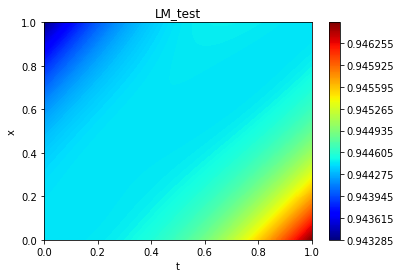

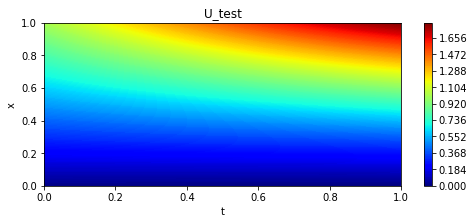

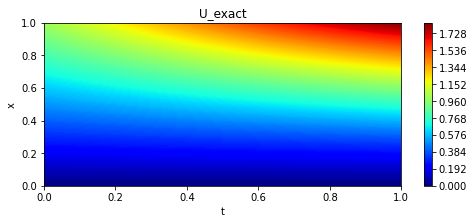

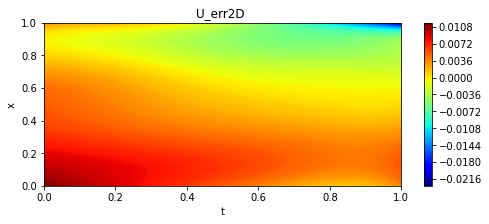

(100, 100) (100, 100) (100, 100) (100, 100)
[[0.       0.      ]
 [0.       0.010101]
 [0.       0.020202]
 [0.       0.030303]
 [0.       0.040404]
 [0.       0.050505]
 [0.       0.060606]
 [0.       0.070707]
 [0.       0.080808]
 [0.       0.090909]
 [0.       0.10101 ]
 [0.       0.111111]
 [0.       0.121212]
 [0.       0.131313]
 [0.       0.141414]
 [0.       0.151515]
 [0.       0.161616]
 [0.       0.171717]
 [0.       0.181818]
 [0.       0.191919]
 [0.       0.20202 ]
 [0.       0.212121]
 [0.       0.222222]
 [0.       0.232323]
 [0.       0.242424]
 [0.       0.252525]
 [0.       0.262626]
 [0.       0.272727]
 [0.       0.282828]
 [0.       0.292929]
 [0.       0.30303 ]
 [0.       0.313131]
 [0.       0.323232]
 [0.       0.333333]
 [0.       0.343434]
 [0.       0.353535]
 [0.       0.363636]
 [0.       0.373737]
 [0.       0.383838]
 [0.       0.393939]
 [0.       0.40404 ]
 [0.       0.414141]
 [0.       0.424242]
 [0.       0.434343]
 [0.       0.444444]
 [0.       

 [1.       1.      ]] [[0.944439 0.944438 0.944437 0.944437 0.944436 0.944435 0.944435 0.944434
  0.944433 0.944433 0.944432 0.944431 0.944431 0.94443  0.944429 0.944428
  0.944427 0.944426 0.944425 0.944423 0.944422 0.94442  0.944419 0.944417
  0.944415 0.944413 0.94441  0.944408 0.944405 0.944402 0.944399 0.944395
  0.944392 0.944388 0.944384 0.944379 0.944375 0.94437  0.944365 0.944359
  0.944354 0.944347 0.944341 0.944334 0.944327 0.94432  0.944312 0.944304
  0.944296 0.944287 0.944278 0.944268 0.944258 0.944248 0.944237 0.944226
  0.944215 0.944203 0.94419  0.944177 0.944164 0.944151 0.944137 0.944122
  0.944107 0.944092 0.944076 0.94406  0.944043 0.944026 0.944008 0.94399
  0.943971 0.943952 0.943933 0.943913 0.943892 0.943871 0.94385  0.943828
  0.943806 0.943783 0.94376  0.943736 0.943712 0.943687 0.943662 0.943636
  0.94361  0.943584 0.943557 0.943529 0.943502 0.943473 0.943444 0.943415
  0.943386 0.943356 0.943325 0.943295]
 [0.944438 0.944438 0.944437 0.944436 0.944436 0.944

It: 5002, Loss: 7.274e-04
It: 5003, Loss: 4.905e-04
It: 5004, Loss: 5.660e-04
It: 5005, Loss: 4.810e-04
It: 5006, Loss: 3.223e-04
It: 5007, Loss: 3.340e-04
It: 5008, Loss: 4.337e-04
It: 5009, Loss: 4.038e-04
It: 5010, Loss: 3.408e-04
It: 5011, Loss: 3.970e-04
It: 5012, Loss: 4.680e-04
It: 5013, Loss: 4.846e-04
It: 5014, Loss: 5.338e-04
It: 5015, Loss: 6.853e-04
It: 5016, Loss: 8.608e-04
It: 5017, Loss: 1.057e-03
It: 5018, Loss: 1.268e-03
It: 5019, Loss: 1.678e-03
It: 5020, Loss: 2.157e-03
It: 5021, Loss: 2.848e-03
It: 5022, Loss: 3.584e-03
It: 5023, Loss: 4.764e-03
It: 5024, Loss: 5.912e-03
It: 5025, Loss: 7.588e-03
It: 5026, Loss: 8.695e-03
It: 5027, Loss: 9.862e-03
It: 5028, Loss: 9.766e-03
It: 5029, Loss: 8.654e-03
It: 5030, Loss: 6.367e-03
It: 5031, Loss: 3.687e-03
It: 5032, Loss: 1.543e-03
It: 5033, Loss: 4.670e-04
It: 5034, Loss: 5.622e-04
It: 5035, Loss: 1.481e-03
It: 5036, Loss: 2.675e-03
It: 5037, Loss: 3.404e-03
It: 5038, Loss: 3.614e-03
It: 5039, Loss: 3.097e-03
It: 5040, Lo

It: 5318, Loss: 1.462e-04
It: 5319, Loss: 1.574e-04
It: 5320, Loss: 1.879e-04
It: 5321, Loss: 2.557e-04
It: 5322, Loss: 3.790e-04
It: 5323, Loss: 5.938e-04
It: 5324, Loss: 9.707e-04
It: 5325, Loss: 1.659e-03
It: 5326, Loss: 2.893e-03
It: 5327, Loss: 5.152e-03
It: 5328, Loss: 9.014e-03
It: 5329, Loss: 1.563e-02
It: 5330, Loss: 2.491e-02
It: 5331, Loss: 3.687e-02
It: 5332, Loss: 4.300e-02
It: 5333, Loss: 3.987e-02
It: 5334, Loss: 2.037e-02
It: 5335, Loss: 3.724e-03
It: 5336, Loss: 2.866e-03
It: 5337, Loss: 1.304e-02
It: 5338, Loss: 1.723e-02
It: 5339, Loss: 7.740e-03
It: 5340, Loss: 2.582e-03
It: 5341, Loss: 7.845e-03
It: 5342, Loss: 9.290e-03
It: 5343, Loss: 4.711e-03
It: 5344, Loss: 3.165e-03
It: 5345, Loss: 5.614e-03
It: 5346, Loss: 5.378e-03
It: 5347, Loss: 3.591e-03
It: 5348, Loss: 4.152e-03
It: 5349, Loss: 4.477e-03
It: 5350, Loss: 4.323e-03
It: 5351, Loss: 4.693e-03
It: 5352, Loss: 4.896e-03
It: 5353, Loss: 5.598e-03
It: 5354, Loss: 7.777e-03
It: 5355, Loss: 8.459e-03
It: 5356, Lo

It: 5634, Loss: 1.007e-02
It: 5635, Loss: 1.152e-02
It: 5636, Loss: 9.600e-03
It: 5637, Loss: 8.967e-03
It: 5638, Loss: 1.052e-02
It: 5639, Loss: 1.028e-02
It: 5640, Loss: 9.121e-03
It: 5641, Loss: 1.006e-02
It: 5642, Loss: 1.126e-02
It: 5643, Loss: 1.128e-02
It: 5644, Loss: 1.245e-02
It: 5645, Loss: 1.565e-02
It: 5646, Loss: 1.978e-02
It: 5647, Loss: 2.606e-02
It: 5648, Loss: 3.783e-02
It: 5649, Loss: 5.782e-02
It: 5650, Loss: 9.042e-02
It: 5651, Loss: 1.451e-01
It: 5652, Loss: 2.369e-01
It: 5653, Loss: 3.857e-01
It: 5654, Loss: 6.197e-01
It: 5655, Loss: 9.605e-01
It: 5656, Loss: 1.403e+00
It: 5657, Loss: 1.832e+00
It: 5658, Loss: 2.019e+00
It: 5659, Loss: 1.672e+00
It: 5660, Loss: 8.582e-01
It: 5661, Loss: 1.334e-01
It: 5662, Loss: 7.607e-02
It: 5663, Loss: 5.245e-01
It: 5664, Loss: 7.333e-01
It: 5665, Loss: 3.828e-01
It: 5666, Loss: 2.127e-02
It: 5667, Loss: 1.549e-01
It: 5668, Loss: 4.052e-01
It: 5669, Loss: 2.615e-01
It: 5670, Loss: 1.763e-02
It: 5671, Loss: 1.103e-01
It: 5672, Lo

It: 5950, Loss: 3.089e-02
It: 5951, Loss: 2.162e-02
It: 5952, Loss: 1.962e-02
It: 5953, Loss: 2.215e-02
It: 5954, Loss: 1.286e-02
It: 5955, Loss: 1.819e-02
It: 5956, Loss: 1.323e-02
It: 5957, Loss: 1.311e-02
It: 5958, Loss: 1.608e-02
It: 5959, Loss: 8.271e-03
It: 5960, Loss: 1.536e-02
It: 5961, Loss: 8.166e-03
It: 5962, Loss: 1.147e-02
It: 5963, Loss: 1.030e-02
It: 5964, Loss: 8.144e-03
It: 5965, Loss: 1.065e-02
It: 5966, Loss: 7.339e-03
It: 5967, Loss: 9.031e-03
It: 5968, Loss: 7.689e-03
It: 5969, Loss: 7.504e-03
It: 5970, Loss: 7.535e-03
It: 5971, Loss: 7.040e-03
It: 5972, Loss: 6.733e-03
It: 5973, Loss: 6.801e-03
It: 5974, Loss: 6.430e-03
It: 5975, Loss: 6.053e-03
It: 5976, Loss: 6.494e-03
It: 5977, Loss: 5.634e-03
It: 5978, Loss: 6.105e-03
It: 5979, Loss: 5.811e-03
It: 5980, Loss: 5.423e-03
It: 5981, Loss: 6.032e-03
It: 5982, Loss: 5.119e-03
It: 5983, Loss: 5.756e-03
It: 5984, Loss: 5.368e-03
It: 5985, Loss: 5.170e-03
It: 5986, Loss: 5.533e-03
It: 5987, Loss: 4.985e-03
It: 5988, Lo

It: 6266, Loss: 7.527e-03
It: 6267, Loss: 1.573e-02
It: 6268, Loss: 9.144e-03
It: 6269, Loss: 8.096e-03
It: 6270, Loss: 1.256e-02
It: 6271, Loss: 7.075e-03
It: 6272, Loss: 8.302e-03
It: 6273, Loss: 9.964e-03
It: 6274, Loss: 6.392e-03
It: 6275, Loss: 8.168e-03
It: 6276, Loss: 7.549e-03
It: 6277, Loss: 6.207e-03
It: 6278, Loss: 7.610e-03
It: 6279, Loss: 5.580e-03
It: 6280, Loss: 6.204e-03
It: 6281, Loss: 6.401e-03
It: 6282, Loss: 4.379e-03
It: 6283, Loss: 5.849e-03
It: 6284, Loss: 5.194e-03
It: 6285, Loss: 4.076e-03
It: 6286, Loss: 5.214e-03
It: 6287, Loss: 4.553e-03
It: 6288, Loss: 4.025e-03
It: 6289, Loss: 4.599e-03
It: 6290, Loss: 4.149e-03
It: 6291, Loss: 3.887e-03
It: 6292, Loss: 4.045e-03
It: 6293, Loss: 3.768e-03
It: 6294, Loss: 3.747e-03
It: 6295, Loss: 3.561e-03
It: 6296, Loss: 3.557e-03
It: 6297, Loss: 3.560e-03
It: 6298, Loss: 3.221e-03
It: 6299, Loss: 3.437e-03
It: 6300, Loss: 3.333e-03
It: 6301, Loss: 3.084e-03
It: 6302, Loss: 3.295e-03
It: 6303, Loss: 3.185e-03
It: 6304, Lo

It: 6582, Loss: 3.842e-02
It: 6583, Loss: 2.722e-02
It: 6584, Loss: 4.520e-02
It: 6585, Loss: 4.938e-02
It: 6586, Loss: 1.444e-02
It: 6587, Loss: 1.822e-02
It: 6588, Loss: 3.207e-02
It: 6589, Loss: 1.569e-02
It: 6590, Loss: 2.303e-02
It: 6591, Loss: 2.768e-02
It: 6592, Loss: 1.473e-02
It: 6593, Loss: 1.855e-02
It: 6594, Loss: 1.823e-02
It: 6595, Loss: 1.110e-02
It: 6596, Loss: 1.315e-02
It: 6597, Loss: 1.432e-02
It: 6598, Loss: 8.948e-03
It: 6599, Loss: 9.434e-03
It: 6600, Loss: 1.194e-02
It: 6601, Loss: 4.741e-03
It: 6602, Loss: 9.957e-03
It: 6603, Loss: 7.526e-03
It: 6604, Loss: 6.010e-03
It: 6605, Loss: 7.702e-03
It: 6606, Loss: 6.204e-03
It: 6607, Loss: 4.921e-03
It: 6608, Loss: 6.139e-03
It: 6609, Loss: 4.627e-03
It: 6610, Loss: 3.910e-03
It: 6611, Loss: 5.574e-03
It: 6612, Loss: 3.507e-03
It: 6613, Loss: 3.983e-03
It: 6614, Loss: 4.451e-03
It: 6615, Loss: 3.317e-03
It: 6616, Loss: 3.450e-03
It: 6617, Loss: 3.591e-03
It: 6618, Loss: 3.184e-03
It: 6619, Loss: 2.810e-03
It: 6620, Lo

It: 6898, Loss: 2.687e-03
It: 6899, Loss: 1.911e-03
It: 6900, Loss: 2.410e-03
It: 6901, Loss: 2.311e-03
It: 6902, Loss: 1.694e-03
It: 6903, Loss: 2.082e-03
It: 6904, Loss: 2.098e-03
It: 6905, Loss: 1.664e-03
It: 6906, Loss: 1.932e-03
It: 6907, Loss: 1.926e-03
It: 6908, Loss: 1.520e-03
It: 6909, Loss: 1.773e-03
It: 6910, Loss: 1.815e-03
It: 6911, Loss: 1.509e-03
It: 6912, Loss: 1.682e-03
It: 6913, Loss: 1.660e-03
It: 6914, Loss: 1.428e-03
It: 6915, Loss: 1.559e-03
It: 6916, Loss: 1.584e-03
It: 6917, Loss: 1.416e-03
It: 6918, Loss: 1.479e-03
It: 6919, Loss: 1.505e-03
It: 6920, Loss: 1.369e-03
It: 6921, Loss: 1.407e-03
It: 6922, Loss: 1.450e-03
It: 6923, Loss: 1.359e-03
It: 6924, Loss: 1.366e-03
It: 6925, Loss: 1.390e-03
It: 6926, Loss: 1.329e-03
It: 6927, Loss: 1.319e-03
It: 6928, Loss: 1.343e-03
It: 6929, Loss: 1.319e-03
It: 6930, Loss: 1.299e-03
It: 6931, Loss: 1.308e-03
It: 6932, Loss: 1.297e-03
It: 6933, Loss: 1.274e-03
It: 6934, Loss: 1.274e-03
It: 6935, Loss: 1.276e-03
It: 6936, Lo

It: 7214, Loss: 9.162e-03
It: 7215, Loss: 1.086e-02
It: 7216, Loss: 5.906e-03
It: 7217, Loss: 2.469e-03
It: 7218, Loss: 3.941e-03
It: 7219, Loss: 6.635e-03
It: 7220, Loss: 6.153e-03
It: 7221, Loss: 2.637e-03
It: 7222, Loss: 1.102e-03
It: 7223, Loss: 2.836e-03
It: 7224, Loss: 4.682e-03
It: 7225, Loss: 4.293e-03
It: 7226, Loss: 2.255e-03
It: 7227, Loss: 1.333e-03
It: 7228, Loss: 2.197e-03
It: 7229, Loss: 3.007e-03
It: 7230, Loss: 2.591e-03
It: 7231, Loss: 1.391e-03
It: 7232, Loss: 9.209e-04
It: 7233, Loss: 1.553e-03
It: 7234, Loss: 2.245e-03
It: 7235, Loss: 2.184e-03
It: 7236, Loss: 1.470e-03
It: 7237, Loss: 1.008e-03
It: 7238, Loss: 1.156e-03
It: 7239, Loss: 1.502e-03
It: 7240, Loss: 1.521e-03
It: 7241, Loss: 1.170e-03
It: 7242, Loss: 8.558e-04
It: 7243, Loss: 8.683e-04
It: 7244, Loss: 1.125e-03
It: 7245, Loss: 1.310e-03
It: 7246, Loss: 1.227e-03
It: 7247, Loss: 9.917e-04
It: 7248, Loss: 8.170e-04
It: 7249, Loss: 8.266e-04
It: 7250, Loss: 9.435e-04
It: 7251, Loss: 1.019e-03
It: 7252, Lo

It: 7530, Loss: 5.118e-03
It: 7531, Loss: 3.501e-03
It: 7532, Loss: 2.270e-03
It: 7533, Loss: 2.126e-03
It: 7534, Loss: 2.782e-03
It: 7535, Loss: 3.305e-03
It: 7536, Loss: 2.728e-03
It: 7537, Loss: 1.786e-03
It: 7538, Loss: 1.158e-03
It: 7539, Loss: 1.270e-03
It: 7540, Loss: 1.711e-03
It: 7541, Loss: 1.813e-03
It: 7542, Loss: 1.467e-03
It: 7543, Loss: 9.972e-04
It: 7544, Loss: 8.479e-04
It: 7545, Loss: 1.054e-03
It: 7546, Loss: 1.299e-03
It: 7547, Loss: 1.328e-03
It: 7548, Loss: 1.129e-03
It: 7549, Loss: 9.667e-04
It: 7550, Loss: 1.020e-03
It: 7551, Loss: 1.259e-03
It: 7552, Loss: 1.523e-03
It: 7553, Loss: 1.694e-03
It: 7554, Loss: 1.836e-03
It: 7555, Loss: 2.091e-03
It: 7556, Loss: 2.596e-03
It: 7557, Loss: 3.390e-03
It: 7558, Loss: 4.481e-03
It: 7559, Loss: 5.971e-03
It: 7560, Loss: 8.062e-03
It: 7561, Loss: 1.115e-02
It: 7562, Loss: 1.582e-02
It: 7563, Loss: 2.260e-02
It: 7564, Loss: 3.288e-02
It: 7565, Loss: 4.661e-02
It: 7566, Loss: 6.633e-02
It: 7567, Loss: 8.880e-02
It: 7568, Lo

It: 7846, Loss: 1.285e-02
It: 7847, Loss: 1.261e-02
It: 7848, Loss: 8.834e-03
It: 7849, Loss: 4.206e-03
It: 7850, Loss: 1.005e-03
It: 7851, Loss: 1.272e-03
It: 7852, Loss: 3.679e-03
It: 7853, Loss: 4.965e-03
It: 7854, Loss: 3.951e-03
It: 7855, Loss: 1.601e-03
It: 7856, Loss: 7.926e-04
It: 7857, Loss: 1.880e-03
It: 7858, Loss: 2.980e-03
It: 7859, Loss: 2.748e-03
It: 7860, Loss: 1.444e-03
It: 7861, Loss: 6.792e-04
It: 7862, Loss: 1.033e-03
It: 7863, Loss: 1.772e-03
It: 7864, Loss: 1.996e-03
It: 7865, Loss: 1.469e-03
It: 7866, Loss: 8.214e-04
It: 7867, Loss: 6.108e-04
It: 7868, Loss: 9.032e-04
It: 7869, Loss: 1.291e-03
It: 7870, Loss: 1.330e-03
It: 7871, Loss: 1.021e-03
It: 7872, Loss: 6.504e-04
It: 7873, Loss: 5.366e-04
It: 7874, Loss: 7.171e-04
It: 7875, Loss: 9.464e-04
It: 7876, Loss: 9.820e-04
It: 7877, Loss: 8.002e-04
It: 7878, Loss: 5.947e-04
It: 7879, Loss: 5.153e-04
It: 7880, Loss: 5.773e-04
It: 7881, Loss: 6.936e-04
It: 7882, Loss: 7.749e-04
It: 7883, Loss: 7.823e-04
It: 7884, Lo

It: 8162, Loss: 2.861e-03
It: 8163, Loss: 3.330e-03
It: 8164, Loss: 3.628e-03
It: 8165, Loss: 4.088e-03
It: 8166, Loss: 4.190e-03
It: 8167, Loss: 4.393e-03
It: 8168, Loss: 4.067e-03
It: 8169, Loss: 3.790e-03
It: 8170, Loss: 3.080e-03
It: 8171, Loss: 2.549e-03
It: 8172, Loss: 2.045e-03
It: 8173, Loss: 1.976e-03
It: 8174, Loss: 2.375e-03
It: 8175, Loss: 3.237e-03
It: 8176, Loss: 4.734e-03
It: 8177, Loss: 6.342e-03
It: 8178, Loss: 8.695e-03
It: 8179, Loss: 1.031e-02
It: 8180, Loss: 1.246e-02
It: 8181, Loss: 1.243e-02
It: 8182, Loss: 1.198e-02
It: 8183, Loss: 9.746e-03
It: 8184, Loss: 7.279e-03
It: 8185, Loss: 5.643e-03
It: 8186, Loss: 4.045e-03
It: 8187, Loss: 2.924e-03
It: 8188, Loss: 1.739e-03
It: 8189, Loss: 1.121e-03
It: 8190, Loss: 1.442e-03
It: 8191, Loss: 2.558e-03
It: 8192, Loss: 3.949e-03
It: 8193, Loss: 4.346e-03
It: 8194, Loss: 4.184e-03
It: 8195, Loss: 3.047e-03
It: 8196, Loss: 2.024e-03
It: 8197, Loss: 1.354e-03
It: 8198, Loss: 1.155e-03
It: 8199, Loss: 1.224e-03
It: 8200, Lo

It: 8478, Loss: 2.405e-03
It: 8479, Loss: 3.241e-03
It: 8480, Loss: 4.585e-03
It: 8481, Loss: 6.162e-03
It: 8482, Loss: 8.558e-03
It: 8483, Loss: 1.048e-02
It: 8484, Loss: 1.282e-02
It: 8485, Loss: 1.251e-02
It: 8486, Loss: 1.118e-02
It: 8487, Loss: 7.151e-03
It: 8488, Loss: 3.703e-03
It: 8489, Loss: 2.112e-03
It: 8490, Loss: 2.795e-03
It: 8491, Loss: 4.606e-03
It: 8492, Loss: 5.518e-03
It: 8493, Loss: 4.962e-03
It: 8494, Loss: 3.136e-03
It: 8495, Loss: 1.788e-03
It: 8496, Loss: 1.684e-03
It: 8497, Loss: 2.630e-03
It: 8498, Loss: 3.664e-03
It: 8499, Loss: 3.624e-03
It: 8500, Loss: 2.897e-03
It: 8501, Loss: 1.931e-03
It: 8502, Loss: 1.436e-03
It: 8503, Loss: 1.621e-03
It: 8504, Loss: 2.018e-03
It: 8505, Loss: 2.249e-03
It: 8506, Loss: 1.975e-03
It: 8507, Loss: 1.437e-03
It: 8508, Loss: 8.741e-04
It: 8509, Loss: 5.713e-04
It: 8510, Loss: 5.804e-04
It: 8511, Loss: 7.928e-04
It: 8512, Loss: 1.033e-03
It: 8513, Loss: 1.126e-03
It: 8514, Loss: 1.058e-03
It: 8515, Loss: 8.424e-04
It: 8516, Lo

It: 8794, Loss: 4.012e-04
It: 8795, Loss: 4.209e-04
It: 8796, Loss: 4.123e-04
It: 8797, Loss: 3.990e-04
It: 8798, Loss: 4.164e-04
It: 8799, Loss: 4.420e-04
It: 8800, Loss: 4.553e-04
It: 8801, Loss: 4.838e-04
It: 8802, Loss: 5.398e-04
It: 8803, Loss: 6.118e-04
It: 8804, Loss: 6.964e-04
It: 8805, Loss: 8.393e-04
It: 8806, Loss: 1.040e-03
It: 8807, Loss: 1.346e-03
It: 8808, Loss: 1.751e-03
It: 8809, Loss: 2.416e-03
It: 8810, Loss: 3.274e-03
It: 8811, Loss: 4.654e-03
It: 8812, Loss: 6.270e-03
It: 8813, Loss: 8.841e-03
It: 8814, Loss: 1.121e-02
It: 8815, Loss: 1.464e-02
It: 8816, Loss: 1.600e-02
It: 8817, Loss: 1.734e-02
It: 8818, Loss: 1.465e-02
It: 8819, Loss: 1.136e-02
It: 8820, Loss: 6.436e-03
It: 8821, Loss: 2.909e-03
It: 8822, Loss: 9.549e-04
It: 8823, Loss: 8.740e-04
It: 8824, Loss: 2.195e-03
It: 8825, Loss: 4.295e-03
It: 8826, Loss: 6.377e-03
It: 8827, Loss: 7.203e-03
It: 8828, Loss: 6.660e-03
It: 8829, Loss: 4.703e-03
It: 8830, Loss: 2.328e-03
It: 8831, Loss: 8.022e-04
It: 8832, Lo

It: 9110, Loss: 2.191e-03
It: 9111, Loss: 1.481e-03
It: 9112, Loss: 1.175e-03
It: 9113, Loss: 1.234e-03
It: 9114, Loss: 1.735e-03
It: 9115, Loss: 2.549e-03
It: 9116, Loss: 3.189e-03
It: 9117, Loss: 3.632e-03
It: 9118, Loss: 3.239e-03
It: 9119, Loss: 2.555e-03
It: 9120, Loss: 1.562e-03
It: 9121, Loss: 8.248e-04
It: 9122, Loss: 4.611e-04
It: 9123, Loss: 4.967e-04
It: 9124, Loss: 7.674e-04
It: 9125, Loss: 1.039e-03
It: 9126, Loss: 1.188e-03
It: 9127, Loss: 1.120e-03
It: 9128, Loss: 9.729e-04
It: 9129, Loss: 8.163e-04
It: 9130, Loss: 7.531e-04
It: 9131, Loss: 8.032e-04
It: 9132, Loss: 9.156e-04
It: 9133, Loss: 1.045e-03
It: 9134, Loss: 1.095e-03
It: 9135, Loss: 1.083e-03
It: 9136, Loss: 9.788e-04
It: 9137, Loss: 8.505e-04
It: 9138, Loss: 7.117e-04
It: 9139, Loss: 6.194e-04
It: 9140, Loss: 5.734e-04
It: 9141, Loss: 5.706e-04
It: 9142, Loss: 5.924e-04
It: 9143, Loss: 6.131e-04
It: 9144, Loss: 6.240e-04
It: 9145, Loss: 6.073e-04
It: 9146, Loss: 5.773e-04
It: 9147, Loss: 5.328e-04
It: 9148, Lo

It: 9426, Loss: 1.644e-03
It: 9427, Loss: 9.238e-04
It: 9428, Loss: 5.511e-04
It: 9429, Loss: 7.869e-04
It: 9430, Loss: 1.126e-03
It: 9431, Loss: 1.048e-03
It: 9432, Loss: 6.871e-04
It: 9433, Loss: 4.541e-04
It: 9434, Loss: 5.745e-04
It: 9435, Loss: 8.274e-04
It: 9436, Loss: 8.693e-04
It: 9437, Loss: 6.976e-04
It: 9438, Loss: 4.943e-04
It: 9439, Loss: 4.470e-04
It: 9440, Loss: 5.423e-04
It: 9441, Loss: 6.333e-04
It: 9442, Loss: 6.193e-04
It: 9443, Loss: 5.092e-04
It: 9444, Loss: 4.089e-04
It: 9445, Loss: 3.810e-04
It: 9446, Loss: 4.166e-04
It: 9447, Loss: 4.658e-04
It: 9448, Loss: 4.770e-04
It: 9449, Loss: 4.405e-04
It: 9450, Loss: 3.781e-04
It: 9451, Loss: 3.320e-04
It: 9452, Loss: 3.237e-04
It: 9453, Loss: 3.482e-04
It: 9454, Loss: 3.801e-04
It: 9455, Loss: 3.910e-04
It: 9456, Loss: 3.751e-04
It: 9457, Loss: 3.446e-04
It: 9458, Loss: 3.182e-04
It: 9459, Loss: 3.063e-04
It: 9460, Loss: 3.096e-04
It: 9461, Loss: 3.222e-04
It: 9462, Loss: 3.375e-04
It: 9463, Loss: 3.528e-04
It: 9464, Lo

It: 9742, Loss: 2.374e-03
It: 9743, Loss: 2.876e-03
It: 9744, Loss: 2.703e-03
It: 9745, Loss: 2.222e-03
It: 9746, Loss: 1.533e-03
It: 9747, Loss: 1.050e-03
It: 9748, Loss: 8.858e-04
It: 9749, Loss: 9.600e-04
It: 9750, Loss: 1.120e-03
It: 9751, Loss: 1.146e-03
It: 9752, Loss: 1.022e-03
It: 9753, Loss: 7.504e-04
It: 9754, Loss: 4.873e-04
It: 9755, Loss: 3.271e-04
It: 9756, Loss: 3.180e-04
It: 9757, Loss: 4.258e-04
It: 9758, Loss: 5.711e-04
It: 9759, Loss: 6.871e-04
It: 9760, Loss: 7.220e-04
It: 9761, Loss: 6.970e-04
It: 9762, Loss: 6.276e-04
It: 9763, Loss: 5.705e-04
It: 9764, Loss: 5.437e-04
It: 9765, Loss: 5.678e-04
It: 9766, Loss: 6.285e-04
It: 9767, Loss: 7.168e-04
It: 9768, Loss: 8.129e-04
It: 9769, Loss: 9.090e-04
It: 9770, Loss: 1.007e-03
It: 9771, Loss: 1.115e-03
It: 9772, Loss: 1.248e-03
It: 9773, Loss: 1.441e-03
It: 9774, Loss: 1.697e-03
It: 9775, Loss: 2.105e-03
It: 9776, Loss: 2.612e-03
It: 9777, Loss: 3.416e-03
It: 9778, Loss: 4.270e-03
It: 9779, Loss: 5.527e-03
It: 9780, Lo

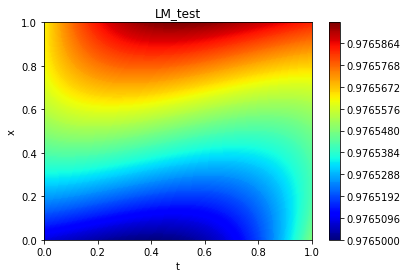

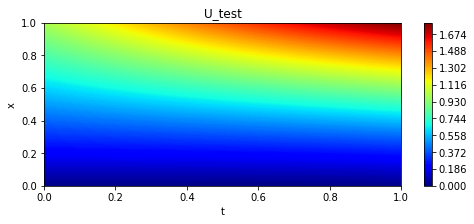

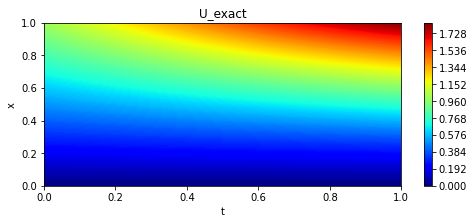

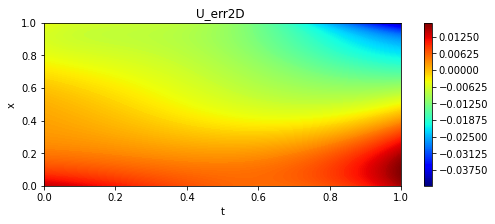

(100, 100) (100, 100) (100, 100) (100, 100)
[[0.       0.      ]
 [0.       0.010101]
 [0.       0.020202]
 [0.       0.030303]
 [0.       0.040404]
 [0.       0.050505]
 [0.       0.060606]
 [0.       0.070707]
 [0.       0.080808]
 [0.       0.090909]
 [0.       0.10101 ]
 [0.       0.111111]
 [0.       0.121212]
 [0.       0.131313]
 [0.       0.141414]
 [0.       0.151515]
 [0.       0.161616]
 [0.       0.171717]
 [0.       0.181818]
 [0.       0.191919]
 [0.       0.20202 ]
 [0.       0.212121]
 [0.       0.222222]
 [0.       0.232323]
 [0.       0.242424]
 [0.       0.252525]
 [0.       0.262626]
 [0.       0.272727]
 [0.       0.282828]
 [0.       0.292929]
 [0.       0.30303 ]
 [0.       0.313131]
 [0.       0.323232]
 [0.       0.333333]
 [0.       0.343434]
 [0.       0.353535]
 [0.       0.363636]
 [0.       0.373737]
 [0.       0.383838]
 [0.       0.393939]
 [0.       0.40404 ]
 [0.       0.414141]
 [0.       0.424242]
 [0.       0.434343]
 [0.       0.444444]
 [0.       

 [1.       1.      ]] [[0.976508 0.976509 0.97651  0.976511 0.976512 0.976513 0.976514 0.976515
  0.976516 0.976517 0.976518 0.976519 0.97652  0.97652  0.976521 0.976522
  0.976523 0.976524 0.976525 0.976526 0.976527 0.976528 0.976529 0.976529
  0.97653  0.976531 0.976532 0.976533 0.976534 0.976534 0.976535 0.976536
  0.976537 0.976538 0.976538 0.976539 0.97654  0.976541 0.976541 0.976542
  0.976543 0.976544 0.976544 0.976545 0.976546 0.976546 0.976547 0.976547
  0.976548 0.976549 0.976549 0.97655  0.97655  0.976551 0.976552 0.976552
  0.976553 0.976553 0.976554 0.976554 0.976555 0.976555 0.976556 0.976556
  0.976556 0.976557 0.976557 0.976558 0.976558 0.976558 0.976559 0.976559
  0.976559 0.97656  0.97656  0.97656  0.97656  0.976561 0.976561 0.976561
  0.976561 0.976561 0.976561 0.976562 0.976562 0.976562 0.976562 0.976562
  0.976562 0.976562 0.976562 0.976562 0.976562 0.976562 0.976562 0.976562
  0.976562 0.976562 0.976562 0.976562]
 [0.976508 0.976509 0.97651  0.976511 0.976512 0.97

It: 10001, Loss: 7.687e-03
It: 10002, Loss: 5.462e-03
It: 10003, Loss: 3.155e-03
It: 10004, Loss: 1.316e-03
It: 10005, Loss: 9.197e-04
It: 10006, Loss: 1.973e-03
It: 10007, Loss: 3.265e-03
It: 10008, Loss: 3.816e-03
It: 10009, Loss: 3.464e-03
It: 10010, Loss: 3.244e-03
It: 10011, Loss: 2.941e-03
It: 10012, Loss: 2.188e-03
It: 10013, Loss: 1.244e-03
It: 10014, Loss: 6.954e-04
It: 10015, Loss: 6.430e-04
It: 10016, Loss: 8.569e-04
It: 10017, Loss: 1.197e-03
It: 10018, Loss: 1.434e-03
It: 10019, Loss: 1.366e-03
It: 10020, Loss: 1.314e-03
It: 10021, Loss: 1.378e-03
It: 10022, Loss: 1.209e-03
It: 10023, Loss: 8.630e-04
It: 10024, Loss: 5.317e-04
It: 10025, Loss: 4.309e-04
It: 10026, Loss: 4.336e-04
It: 10027, Loss: 4.330e-04
It: 10028, Loss: 4.864e-04
It: 10029, Loss: 5.509e-04
It: 10030, Loss: 5.702e-04
It: 10031, Loss: 6.077e-04
It: 10032, Loss: 7.064e-04
It: 10033, Loss: 7.680e-04
It: 10034, Loss: 7.622e-04
It: 10035, Loss: 7.418e-04
It: 10036, Loss: 7.449e-04
It: 10037, Loss: 7.437e-04
I

It: 10305, Loss: 2.516e-04
It: 10306, Loss: 2.563e-04
It: 10307, Loss: 2.701e-04
It: 10308, Loss: 2.848e-04
It: 10309, Loss: 2.918e-04
It: 10310, Loss: 2.998e-04
It: 10311, Loss: 3.161e-04
It: 10312, Loss: 3.406e-04
It: 10313, Loss: 3.722e-04
It: 10314, Loss: 4.257e-04
It: 10315, Loss: 5.135e-04
It: 10316, Loss: 6.633e-04
It: 10317, Loss: 8.909e-04
It: 10318, Loss: 1.284e-03
It: 10319, Loss: 1.870e-03
It: 10320, Loss: 2.878e-03
It: 10321, Loss: 4.206e-03
It: 10322, Loss: 6.327e-03
It: 10323, Loss: 8.314e-03
It: 10324, Loss: 1.067e-02
It: 10325, Loss: 1.069e-02
It: 10326, Loss: 9.487e-03
It: 10327, Loss: 6.081e-03
It: 10328, Loss: 3.923e-03
It: 10329, Loss: 3.657e-03
It: 10330, Loss: 5.232e-03
It: 10331, Loss: 8.068e-03
It: 10332, Loss: 9.285e-03
It: 10333, Loss: 1.012e-02
It: 10334, Loss: 7.440e-03
It: 10335, Loss: 6.307e-03
It: 10336, Loss: 6.316e-03
It: 10337, Loss: 6.011e-03
It: 10338, Loss: 5.613e-03
It: 10339, Loss: 4.486e-03
It: 10340, Loss: 3.623e-03
It: 10341, Loss: 1.879e-03
I

It: 10609, Loss: 1.468e-03
It: 10610, Loss: 1.742e-03
It: 10611, Loss: 2.246e-03
It: 10612, Loss: 2.795e-03
It: 10613, Loss: 3.778e-03
It: 10614, Loss: 4.765e-03
It: 10615, Loss: 6.489e-03
It: 10616, Loss: 7.987e-03
It: 10617, Loss: 1.040e-02
It: 10618, Loss: 1.197e-02
It: 10619, Loss: 1.378e-02
It: 10620, Loss: 1.412e-02
It: 10621, Loss: 1.304e-02
It: 10622, Loss: 1.101e-02
It: 10623, Loss: 7.492e-03
It: 10624, Loss: 4.562e-03
It: 10625, Loss: 2.262e-03
It: 10626, Loss: 1.453e-03
It: 10627, Loss: 2.067e-03
It: 10628, Loss: 3.780e-03
It: 10629, Loss: 5.501e-03
It: 10630, Loss: 6.138e-03
It: 10631, Loss: 5.570e-03
It: 10632, Loss: 3.613e-03
It: 10633, Loss: 1.744e-03
It: 10634, Loss: 6.827e-04
It: 10635, Loss: 6.987e-04
It: 10636, Loss: 1.380e-03
It: 10637, Loss: 2.120e-03
It: 10638, Loss: 2.714e-03
It: 10639, Loss: 2.785e-03
It: 10640, Loss: 2.346e-03
It: 10641, Loss: 1.575e-03
It: 10642, Loss: 8.892e-04
It: 10643, Loss: 5.410e-04
It: 10644, Loss: 5.577e-04
It: 10645, Loss: 8.705e-04
I

It: 10913, Loss: 1.826e-03
It: 10914, Loss: 1.876e-03
It: 10915, Loss: 1.798e-03
It: 10916, Loss: 1.818e-03
It: 10917, Loss: 2.124e-03
It: 10918, Loss: 2.421e-03
It: 10919, Loss: 2.736e-03
It: 10920, Loss: 2.934e-03
It: 10921, Loss: 3.291e-03
It: 10922, Loss: 3.779e-03
It: 10923, Loss: 4.342e-03
It: 10924, Loss: 4.853e-03
It: 10925, Loss: 5.147e-03
It: 10926, Loss: 5.321e-03
It: 10927, Loss: 5.429e-03
It: 10928, Loss: 5.569e-03
It: 10929, Loss: 5.517e-03
It: 10930, Loss: 5.092e-03
It: 10931, Loss: 4.448e-03
It: 10932, Loss: 3.441e-03
It: 10933, Loss: 2.530e-03
It: 10934, Loss: 1.652e-03
It: 10935, Loss: 1.045e-03
It: 10936, Loss: 6.773e-04
It: 10937, Loss: 4.063e-04
It: 10938, Loss: 2.690e-04
It: 10939, Loss: 3.280e-04
It: 10940, Loss: 5.262e-04
It: 10941, Loss: 7.277e-04
It: 10942, Loss: 8.624e-04
It: 10943, Loss: 9.968e-04
It: 10944, Loss: 1.095e-03
It: 10945, Loss: 1.108e-03
It: 10946, Loss: 1.121e-03
It: 10947, Loss: 1.139e-03
It: 10948, Loss: 1.146e-03
It: 10949, Loss: 1.064e-03
I

It: 11217, Loss: 1.506e-03
It: 11218, Loss: 2.038e-03
It: 11219, Loss: 2.671e-03
It: 11220, Loss: 3.708e-03
It: 11221, Loss: 4.711e-03
It: 11222, Loss: 6.211e-03
It: 11223, Loss: 7.011e-03
It: 11224, Loss: 7.894e-03
It: 11225, Loss: 6.923e-03
It: 11226, Loss: 5.636e-03
It: 11227, Loss: 3.234e-03
It: 11228, Loss: 1.683e-03
It: 11229, Loss: 1.211e-03
It: 11230, Loss: 1.816e-03
It: 11231, Loss: 2.763e-03
It: 11232, Loss: 2.937e-03
It: 11233, Loss: 2.319e-03
It: 11234, Loss: 1.200e-03
It: 11235, Loss: 4.726e-04
It: 11236, Loss: 4.778e-04
It: 11237, Loss: 9.474e-04
It: 11238, Loss: 1.330e-03
It: 11239, Loss: 1.205e-03
It: 11240, Loss: 7.469e-04
It: 11241, Loss: 3.258e-04
It: 11242, Loss: 2.746e-04
It: 11243, Loss: 5.451e-04
It: 11244, Loss: 8.130e-04
It: 11245, Loss: 8.574e-04
It: 11246, Loss: 6.322e-04
It: 11247, Loss: 3.949e-04
It: 11248, Loss: 3.136e-04
It: 11249, Loss: 4.147e-04
It: 11250, Loss: 5.743e-04
It: 11251, Loss: 6.440e-04
It: 11252, Loss: 6.123e-04
It: 11253, Loss: 5.116e-04
I

It: 11521, Loss: 1.735e-02
It: 11522, Loss: 1.942e-02
It: 11523, Loss: 1.901e-02
It: 11524, Loss: 1.314e-02
It: 11525, Loss: 7.114e-03
It: 11526, Loss: 3.145e-03
It: 11527, Loss: 1.036e-03
It: 11528, Loss: 1.672e-03
It: 11529, Loss: 4.264e-03
It: 11530, Loss: 6.035e-03
It: 11531, Loss: 5.862e-03
It: 11532, Loss: 5.326e-03
It: 11533, Loss: 4.224e-03
It: 11534, Loss: 3.146e-03
It: 11535, Loss: 3.202e-03
It: 11536, Loss: 3.061e-03
It: 11537, Loss: 2.520e-03
It: 11538, Loss: 1.877e-03
It: 11539, Loss: 1.483e-03
It: 11540, Loss: 1.461e-03
It: 11541, Loss: 2.003e-03
It: 11542, Loss: 2.350e-03
It: 11543, Loss: 1.935e-03
It: 11544, Loss: 1.327e-03
It: 11545, Loss: 6.588e-04
It: 11546, Loss: 3.527e-04
It: 11547, Loss: 6.851e-04
It: 11548, Loss: 1.148e-03
It: 11549, Loss: 1.379e-03
It: 11550, Loss: 1.295e-03
It: 11551, Loss: 8.872e-04
It: 11552, Loss: 3.974e-04
It: 11553, Loss: 2.201e-04
It: 11554, Loss: 2.946e-04
It: 11555, Loss: 5.073e-04
It: 11556, Loss: 7.413e-04
It: 11557, Loss: 7.572e-04
I

It: 11825, Loss: 3.758e-03
It: 11826, Loss: 1.915e-03
It: 11827, Loss: 7.038e-04
It: 11828, Loss: 2.053e-04
It: 11829, Loss: 3.217e-04
It: 11830, Loss: 8.752e-04
It: 11831, Loss: 1.587e-03
It: 11832, Loss: 2.188e-03
It: 11833, Loss: 2.482e-03
It: 11834, Loss: 2.433e-03
It: 11835, Loss: 2.034e-03
It: 11836, Loss: 1.477e-03
It: 11837, Loss: 8.941e-04
It: 11838, Loss: 4.517e-04
It: 11839, Loss: 2.033e-04
It: 11840, Loss: 1.465e-04
It: 11841, Loss: 2.483e-04
It: 11842, Loss: 4.456e-04
It: 11843, Loss: 6.633e-04
It: 11844, Loss: 8.481e-04
It: 11845, Loss: 9.658e-04
It: 11846, Loss: 1.003e-03
It: 11847, Loss: 9.693e-04
It: 11848, Loss: 8.674e-04
It: 11849, Loss: 7.354e-04
It: 11850, Loss: 5.909e-04
It: 11851, Loss: 4.540e-04
It: 11852, Loss: 3.359e-04
It: 11853, Loss: 2.466e-04
It: 11854, Loss: 1.888e-04
It: 11855, Loss: 1.615e-04
It: 11856, Loss: 1.602e-04
It: 11857, Loss: 1.842e-04
It: 11858, Loss: 2.344e-04
It: 11859, Loss: 3.185e-04
It: 11860, Loss: 4.453e-04
It: 11861, Loss: 6.581e-04
I

It: 12129, Loss: 2.016e-03
It: 12130, Loss: 2.544e-03
It: 12131, Loss: 3.392e-03
It: 12132, Loss: 4.086e-03
It: 12133, Loss: 5.197e-03
It: 12134, Loss: 5.716e-03
It: 12135, Loss: 6.626e-03
It: 12136, Loss: 6.547e-03
It: 12137, Loss: 6.815e-03
It: 12138, Loss: 6.660e-03
It: 12139, Loss: 6.958e-03
It: 12140, Loss: 7.957e-03
It: 12141, Loss: 8.688e-03
It: 12142, Loss: 9.491e-03
It: 12143, Loss: 7.951e-03
It: 12144, Loss: 5.454e-03
It: 12145, Loss: 2.509e-03
It: 12146, Loss: 9.185e-04
It: 12147, Loss: 7.433e-04
It: 12148, Loss: 1.575e-03
It: 12149, Loss: 2.735e-03
It: 12150, Loss: 3.035e-03
It: 12151, Loss: 2.515e-03
It: 12152, Loss: 1.516e-03
It: 12153, Loss: 1.229e-03
It: 12154, Loss: 1.569e-03
It: 12155, Loss: 1.816e-03
It: 12156, Loss: 1.871e-03
It: 12157, Loss: 1.506e-03
It: 12158, Loss: 1.031e-03
It: 12159, Loss: 4.884e-04
It: 12160, Loss: 2.520e-04
It: 12161, Loss: 3.982e-04
It: 12162, Loss: 6.646e-04
It: 12163, Loss: 7.964e-04
It: 12164, Loss: 7.090e-04
It: 12165, Loss: 6.032e-04
I

It: 12433, Loss: 6.190e-04
It: 12434, Loss: 6.720e-04
It: 12435, Loss: 6.978e-04
It: 12436, Loss: 7.081e-04
It: 12437, Loss: 6.909e-04
It: 12438, Loss: 6.506e-04
It: 12439, Loss: 5.884e-04
It: 12440, Loss: 5.224e-04
It: 12441, Loss: 4.536e-04
It: 12442, Loss: 3.918e-04
It: 12443, Loss: 3.351e-04
It: 12444, Loss: 2.910e-04
It: 12445, Loss: 2.613e-04
It: 12446, Loss: 2.429e-04
It: 12447, Loss: 2.348e-04
It: 12448, Loss: 2.357e-04
It: 12449, Loss: 2.517e-04
It: 12450, Loss: 2.818e-04
It: 12451, Loss: 3.337e-04
It: 12452, Loss: 4.030e-04
It: 12453, Loss: 5.162e-04
It: 12454, Loss: 6.681e-04
It: 12455, Loss: 9.192e-04
It: 12456, Loss: 1.235e-03
It: 12457, Loss: 1.768e-03
It: 12458, Loss: 2.342e-03
It: 12459, Loss: 3.284e-03
It: 12460, Loss: 3.972e-03
It: 12461, Loss: 4.905e-03
It: 12462, Loss: 4.955e-03
It: 12463, Loss: 4.813e-03
It: 12464, Loss: 3.673e-03
It: 12465, Loss: 2.668e-03
It: 12466, Loss: 1.736e-03
It: 12467, Loss: 1.639e-03
It: 12468, Loss: 2.291e-03
It: 12469, Loss: 3.257e-03
I

It: 12737, Loss: 9.346e-04
It: 12738, Loss: 1.057e-03
It: 12739, Loss: 1.162e-03
It: 12740, Loss: 1.349e-03
It: 12741, Loss: 1.508e-03
It: 12742, Loss: 1.786e-03
It: 12743, Loss: 1.942e-03
It: 12744, Loss: 2.280e-03
It: 12745, Loss: 2.362e-03
It: 12746, Loss: 2.532e-03
It: 12747, Loss: 2.374e-03
It: 12748, Loss: 2.149e-03
It: 12749, Loss: 1.702e-03
It: 12750, Loss: 1.250e-03
It: 12751, Loss: 8.351e-04
It: 12752, Loss: 5.954e-04
It: 12753, Loss: 5.457e-04
It: 12754, Loss: 6.635e-04
It: 12755, Loss: 8.902e-04
It: 12756, Loss: 1.057e-03
It: 12757, Loss: 1.160e-03
It: 12758, Loss: 1.067e-03
It: 12759, Loss: 9.096e-04
It: 12760, Loss: 6.672e-04
It: 12761, Loss: 4.661e-04
It: 12762, Loss: 3.244e-04
It: 12763, Loss: 2.755e-04
It: 12764, Loss: 3.012e-04
It: 12765, Loss: 3.611e-04
It: 12766, Loss: 4.161e-04
It: 12767, Loss: 4.343e-04
It: 12768, Loss: 4.137e-04
It: 12769, Loss: 3.577e-04
It: 12770, Loss: 2.863e-04
It: 12771, Loss: 2.135e-04
It: 12772, Loss: 1.560e-04
It: 12773, Loss: 1.222e-04
I

It: 13041, Loss: 6.550e-03
It: 13042, Loss: 5.213e-03
It: 13043, Loss: 3.457e-03
It: 13044, Loss: 1.833e-03
It: 13045, Loss: 7.221e-04
It: 13046, Loss: 7.984e-04
It: 13047, Loss: 1.534e-03
It: 13048, Loss: 1.878e-03
It: 13049, Loss: 1.952e-03
It: 13050, Loss: 2.036e-03
It: 13051, Loss: 2.054e-03
It: 13052, Loss: 1.612e-03
It: 13053, Loss: 1.082e-03
It: 13054, Loss: 7.955e-04
It: 13055, Loss: 7.130e-04
It: 13056, Loss: 6.980e-04
It: 13057, Loss: 6.060e-04
It: 13058, Loss: 6.494e-04
It: 13059, Loss: 7.033e-04
It: 13060, Loss: 6.438e-04
It: 13061, Loss: 4.569e-04
It: 13062, Loss: 3.066e-04
It: 13063, Loss: 2.736e-04
It: 13064, Loss: 2.953e-04
It: 13065, Loss: 3.194e-04
It: 13066, Loss: 3.792e-04
It: 13067, Loss: 5.109e-04
It: 13068, Loss: 6.032e-04
It: 13069, Loss: 6.601e-04
It: 13070, Loss: 6.437e-04
It: 13071, Loss: 6.665e-04
It: 13072, Loss: 6.704e-04
It: 13073, Loss: 6.627e-04
It: 13074, Loss: 6.234e-04
It: 13075, Loss: 6.234e-04
It: 13076, Loss: 6.291e-04
It: 13077, Loss: 6.408e-04
I

It: 13345, Loss: 4.777e-03
It: 13346, Loss: 6.201e-03
It: 13347, Loss: 7.535e-03
It: 13348, Loss: 9.046e-03
It: 13349, Loss: 9.572e-03
It: 13350, Loss: 9.472e-03
It: 13351, Loss: 8.326e-03
It: 13352, Loss: 6.499e-03
It: 13353, Loss: 4.489e-03
It: 13354, Loss: 2.309e-03
It: 13355, Loss: 9.544e-04
It: 13356, Loss: 6.598e-04
It: 13357, Loss: 7.522e-04
It: 13358, Loss: 1.091e-03
It: 13359, Loss: 1.767e-03
It: 13360, Loss: 2.368e-03
It: 13361, Loss: 2.563e-03
It: 13362, Loss: 2.239e-03
It: 13363, Loss: 1.962e-03
It: 13364, Loss: 1.643e-03
It: 13365, Loss: 1.143e-03
It: 13366, Loss: 6.586e-04
It: 13367, Loss: 3.979e-04
It: 13368, Loss: 3.137e-04
It: 13369, Loss: 3.491e-04
It: 13370, Loss: 4.931e-04
It: 13371, Loss: 6.732e-04
It: 13372, Loss: 7.739e-04
It: 13373, Loss: 7.622e-04
It: 13374, Loss: 7.578e-04
It: 13375, Loss: 7.448e-04
It: 13376, Loss: 6.616e-04
It: 13377, Loss: 4.947e-04
It: 13378, Loss: 3.248e-04
It: 13379, Loss: 2.154e-04
It: 13380, Loss: 1.671e-04
It: 13381, Loss: 1.584e-04
I

It: 13649, Loss: 1.304e-02
It: 13650, Loss: 1.365e-02
It: 13651, Loss: 1.240e-02
It: 13652, Loss: 9.050e-03
It: 13653, Loss: 5.772e-03
It: 13654, Loss: 3.053e-03
It: 13655, Loss: 1.157e-03
It: 13656, Loss: 1.038e-03
It: 13657, Loss: 2.082e-03
It: 13658, Loss: 3.253e-03
It: 13659, Loss: 3.701e-03
It: 13660, Loss: 3.937e-03
It: 13661, Loss: 3.767e-03
It: 13662, Loss: 2.578e-03
It: 13663, Loss: 1.331e-03
It: 13664, Loss: 7.364e-04
It: 13665, Loss: 6.782e-04
It: 13666, Loss: 7.303e-04
It: 13667, Loss: 9.768e-04
It: 13668, Loss: 1.431e-03
It: 13669, Loss: 1.755e-03
It: 13670, Loss: 1.514e-03
It: 13671, Loss: 1.151e-03
It: 13672, Loss: 1.083e-03
It: 13673, Loss: 9.134e-04
It: 13674, Loss: 5.710e-04
It: 13675, Loss: 2.613e-04
It: 13676, Loss: 2.542e-04
It: 13677, Loss: 3.803e-04
It: 13678, Loss: 3.630e-04
It: 13679, Loss: 3.331e-04
It: 13680, Loss: 4.137e-04
It: 13681, Loss: 4.992e-04
It: 13682, Loss: 4.578e-04
It: 13683, Loss: 3.903e-04
It: 13684, Loss: 3.473e-04
It: 13685, Loss: 3.333e-04
I

It: 13953, Loss: 1.635e-03
It: 13954, Loss: 1.577e-03
It: 13955, Loss: 1.578e-03
It: 13956, Loss: 1.467e-03
It: 13957, Loss: 1.430e-03
It: 13958, Loss: 1.421e-03
It: 13959, Loss: 1.641e-03
It: 13960, Loss: 1.898e-03
It: 13961, Loss: 2.315e-03
It: 13962, Loss: 2.527e-03
It: 13963, Loss: 2.721e-03
It: 13964, Loss: 2.619e-03
It: 13965, Loss: 2.509e-03
It: 13966, Loss: 2.107e-03
It: 13967, Loss: 1.677e-03
It: 13968, Loss: 1.093e-03
It: 13969, Loss: 6.323e-04
It: 13970, Loss: 3.400e-04
It: 13971, Loss: 2.048e-04
It: 13972, Loss: 1.586e-04
It: 13973, Loss: 1.950e-04
It: 13974, Loss: 3.245e-04
It: 13975, Loss: 5.003e-04
It: 13976, Loss: 6.607e-04
It: 13977, Loss: 7.581e-04
It: 13978, Loss: 8.352e-04
It: 13979, Loss: 8.798e-04
It: 13980, Loss: 9.153e-04
It: 13981, Loss: 8.624e-04
It: 13982, Loss: 7.872e-04
It: 13983, Loss: 6.806e-04
It: 13984, Loss: 6.134e-04
It: 13985, Loss: 5.486e-04
It: 13986, Loss: 4.991e-04
It: 13987, Loss: 4.355e-04
It: 13988, Loss: 4.008e-04
It: 13989, Loss: 3.767e-04
I

It: 14257, Loss: 7.010e-03
It: 14258, Loss: 6.984e-03
It: 14259, Loss: 6.961e-03
It: 14260, Loss: 6.945e-03
It: 14261, Loss: 6.941e-03
It: 14262, Loss: 6.968e-03
It: 14263, Loss: 7.054e-03
It: 14264, Loss: 7.287e-03
It: 14265, Loss: 7.819e-03
It: 14266, Loss: 9.149e-03
It: 14267, Loss: 1.198e-02
It: 14268, Loss: 1.932e-02
It: 14269, Loss: 3.207e-02
It: 14270, Loss: 6.432e-02
It: 14271, Loss: 8.044e-02
It: 14272, Loss: 1.065e-01
It: 14273, Loss: 3.850e-02
It: 14274, Loss: 7.712e-03
It: 14275, Loss: 3.210e-02
It: 14276, Loss: 4.031e-02
It: 14277, Loss: 2.071e-02
It: 14278, Loss: 1.009e-02
It: 14279, Loss: 2.502e-02
It: 14280, Loss: 2.627e-02
It: 14281, Loss: 1.264e-02
It: 14282, Loss: 1.708e-02
It: 14283, Loss: 2.625e-02
It: 14284, Loss: 1.899e-02
It: 14285, Loss: 1.333e-02
It: 14286, Loss: 3.214e-02
It: 14287, Loss: 2.430e-02
It: 14288, Loss: 1.742e-02
It: 14289, Loss: 2.895e-02
It: 14290, Loss: 1.252e-02
It: 14291, Loss: 1.455e-02
It: 14292, Loss: 1.642e-02
It: 14293, Loss: 1.424e-02
I

It: 14561, Loss: 4.016e-03
It: 14562, Loss: 3.969e-03
It: 14563, Loss: 3.976e-03
It: 14564, Loss: 3.951e-03
It: 14565, Loss: 3.934e-03
It: 14566, Loss: 3.933e-03
It: 14567, Loss: 3.901e-03
It: 14568, Loss: 3.904e-03
It: 14569, Loss: 3.879e-03
It: 14570, Loss: 3.870e-03
It: 14571, Loss: 3.859e-03
It: 14572, Loss: 3.840e-03
It: 14573, Loss: 3.834e-03
It: 14574, Loss: 3.816e-03
It: 14575, Loss: 3.805e-03
It: 14576, Loss: 3.795e-03
It: 14577, Loss: 3.779e-03
It: 14578, Loss: 3.771e-03
It: 14579, Loss: 3.757e-03
It: 14580, Loss: 3.746e-03
It: 14581, Loss: 3.736e-03
It: 14582, Loss: 3.723e-03
It: 14583, Loss: 3.714e-03
It: 14584, Loss: 3.701e-03
It: 14585, Loss: 3.691e-03
It: 14586, Loss: 3.680e-03
It: 14587, Loss: 3.670e-03
It: 14588, Loss: 3.659e-03
It: 14589, Loss: 3.648e-03
It: 14590, Loss: 3.638e-03
It: 14591, Loss: 3.627e-03
It: 14592, Loss: 3.618e-03
It: 14593, Loss: 3.607e-03
It: 14594, Loss: 3.597e-03
It: 14595, Loss: 3.588e-03
It: 14596, Loss: 3.577e-03
It: 14597, Loss: 3.568e-03
I

It: 14865, Loss: 6.923e-03
It: 14866, Loss: 1.113e-02
It: 14867, Loss: 2.040e-02
It: 14868, Loss: 3.153e-02
It: 14869, Loss: 5.365e-02
It: 14870, Loss: 5.345e-02
It: 14871, Loss: 4.940e-02
It: 14872, Loss: 1.569e-02
It: 14873, Loss: 5.993e-03
It: 14874, Loss: 1.954e-02
It: 14875, Loss: 1.811e-02
It: 14876, Loss: 7.188e-03
It: 14877, Loss: 9.533e-03
It: 14878, Loss: 1.494e-02
It: 14879, Loss: 6.432e-03
It: 14880, Loss: 3.390e-03
It: 14881, Loss: 1.089e-02
It: 14882, Loss: 7.466e-03
It: 14883, Loss: 3.583e-03
It: 14884, Loss: 7.855e-03
It: 14885, Loss: 4.863e-03
It: 14886, Loss: 3.421e-03
It: 14887, Loss: 7.225e-03
It: 14888, Loss: 3.994e-03
It: 14889, Loss: 3.064e-03
It: 14890, Loss: 5.557e-03
It: 14891, Loss: 3.258e-03
It: 14892, Loss: 3.767e-03
It: 14893, Loss: 4.394e-03
It: 14894, Loss: 2.324e-03
It: 14895, Loss: 3.626e-03
It: 14896, Loss: 3.566e-03
It: 14897, Loss: 2.494e-03
It: 14898, Loss: 3.328e-03
It: 14899, Loss: 2.622e-03
It: 14900, Loss: 2.690e-03
It: 14901, Loss: 3.196e-03
I

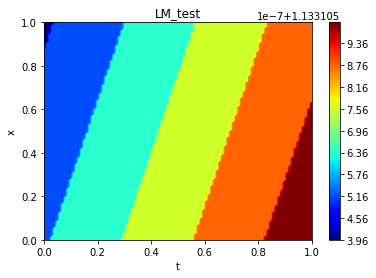

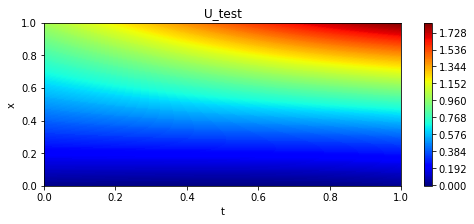

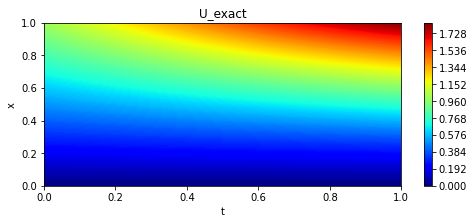

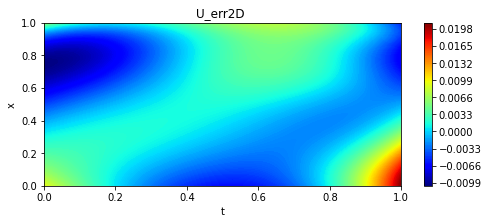

(100, 100) (100, 100) (100, 100) (100, 100)
[[0.       0.      ]
 [0.       0.010101]
 [0.       0.020202]
 [0.       0.030303]
 [0.       0.040404]
 [0.       0.050505]
 [0.       0.060606]
 [0.       0.070707]
 [0.       0.080808]
 [0.       0.090909]
 [0.       0.10101 ]
 [0.       0.111111]
 [0.       0.121212]
 [0.       0.131313]
 [0.       0.141414]
 [0.       0.151515]
 [0.       0.161616]
 [0.       0.171717]
 [0.       0.181818]
 [0.       0.191919]
 [0.       0.20202 ]
 [0.       0.212121]
 [0.       0.222222]
 [0.       0.232323]
 [0.       0.242424]
 [0.       0.252525]
 [0.       0.262626]
 [0.       0.272727]
 [0.       0.282828]
 [0.       0.292929]
 [0.       0.30303 ]
 [0.       0.313131]
 [0.       0.323232]
 [0.       0.333333]
 [0.       0.343434]
 [0.       0.353535]
 [0.       0.363636]
 [0.       0.373737]
 [0.       0.383838]
 [0.       0.393939]
 [0.       0.40404 ]
 [0.       0.414141]
 [0.       0.424242]
 [0.       0.434343]
 [0.       0.444444]
 [0.       

 [1.       1.      ]] [[1.133106 1.133106 1.133106 1.133106 1.133106 1.133106 1.133106 1.133106
  1.133106 1.133106 1.133106 1.133106 1.133106 1.133106 1.133106 1.133106
  1.133106 1.133106 1.133106 1.133106 1.133106 1.133106 1.133106 1.133106
  1.133106 1.133106 1.133106 1.133106 1.133106 1.133106 1.133106 1.133106
  1.133106 1.133106 1.133106 1.133106 1.133106 1.133106 1.133106 1.133106
  1.133106 1.133106 1.133106 1.133106 1.133106 1.133106 1.133106 1.133106
  1.133106 1.133106 1.133106 1.133106 1.133106 1.133106 1.133106 1.133106
  1.133106 1.133106 1.133106 1.133106 1.133106 1.133106 1.133106 1.133106
  1.133106 1.133106 1.133106 1.133106 1.133106 1.133106 1.133106 1.133106
  1.133106 1.133106 1.133106 1.133106 1.133106 1.133106 1.133106 1.133106
  1.133106 1.133106 1.133106 1.133106 1.133106 1.133106 1.133106 1.133105
  1.133105 1.133105 1.133105 1.133105 1.133105 1.133105 1.133105 1.133105
  1.133105 1.133105 1.133105 1.133105]
 [1.133106 1.133106 1.133106 1.133106 1.133106 1.13

  1.133106 1.133106 1.133106 1.133106]] [[ 9.097666e-03  1.878655e-02  2.849638e-02  3.822601e-02  4.797408e-02
   5.773926e-02  6.752020e-02  7.731575e-02  8.712447e-02  9.694552e-02
   1.067774e-01  1.166190e-01  1.264694e-01  1.363273e-01  1.461917e-01
   1.560614e-01  1.659359e-01  1.758137e-01  1.856943e-01  1.955767e-01
   2.054597e-01  2.153431e-01  2.252259e-01  2.351073e-01  2.449870e-01
   2.548638e-01  2.647378e-01  2.746080e-01  2.844741e-01  2.943358e-01
   3.041926e-01  3.140442e-01  3.238904e-01  3.337311e-01  3.435659e-01
   3.533948e-01  3.632177e-01  3.730349e-01  3.828461e-01  3.926514e-01
   4.024513e-01  4.122459e-01  4.220353e-01  4.318200e-01  4.416003e-01
   4.513767e-01  4.611496e-01  4.709198e-01  4.806874e-01  4.904536e-01
   5.002190e-01  5.099840e-01  5.197499e-01  5.295171e-01  5.392867e-01
   5.490599e-01  5.588372e-01  5.686203e-01  5.784098e-01  5.882074e-01
   5.980138e-01  6.078305e-01  6.176589e-01  6.275002e-01  6.373559e-01
   6.472275e-01  6.57116

   1.740831e+00  1.764615e+00  1.788299e+00  1.811858e+00  1.835268e+00]] [[ 9.097666e-03  8.685539e-03  8.294364e-03  7.922978e-03  7.570039e-03
   7.234207e-03  6.914141e-03  6.608677e-03  6.316386e-03  6.036433e-03
   5.767269e-03  5.507910e-03  5.257252e-03  5.014195e-03  4.777545e-03
   4.546259e-03  4.319742e-03  4.096503e-03  3.876155e-03  3.657506e-03
   3.439512e-03  3.221906e-03  3.003703e-03  2.784070e-03  2.562709e-03
   2.338576e-03  2.111582e-03  1.880713e-03  1.645822e-03  1.406490e-03
   1.162329e-03  9.128644e-04  6.580946e-04  3.977517e-04  1.315378e-04
  -1.405770e-04 -4.186820e-04 -7.025091e-04 -9.922668e-04 -1.287955e-03
  -1.589068e-03 -1.895545e-03 -2.207088e-03 -2.523429e-03 -2.844181e-03
  -3.168718e-03 -3.496832e-03 -3.827687e-03 -4.161045e-03 -4.495864e-03
  -4.831518e-03 -5.167558e-03 -5.502645e-03 -5.836481e-03 -6.167872e-03
  -6.495688e-03 -6.819390e-03 -7.137311e-03 -7.448795e-03 -7.752232e-03
  -8.046847e-03 -8.331151e-03 -8.603713e-03 -8.863460e-03 -9.1

It: 15001, Loss: 1.511e-03
It: 15002, Loss: 1.506e-03
It: 15003, Loss: 1.501e-03
It: 15004, Loss: 1.497e-03
It: 15005, Loss: 1.492e-03
It: 15006, Loss: 1.488e-03
It: 15007, Loss: 1.485e-03
It: 15008, Loss: 1.482e-03
It: 15009, Loss: 1.482e-03
It: 15010, Loss: 1.484e-03
It: 15011, Loss: 1.493e-03
It: 15012, Loss: 1.512e-03
It: 15013, Loss: 1.551e-03
It: 15014, Loss: 1.629e-03
It: 15015, Loss: 1.779e-03
It: 15016, Loss: 2.077e-03
It: 15017, Loss: 2.638e-03
It: 15018, Loss: 3.767e-03
It: 15019, Loss: 5.806e-03
It: 15020, Loss: 9.820e-03
It: 15021, Loss: 1.594e-02
It: 15022, Loss: 2.584e-02
It: 15023, Loss: 3.403e-02
It: 15024, Loss: 3.716e-02
It: 15025, Loss: 2.670e-02
It: 15026, Loss: 1.018e-02
It: 15027, Loss: 1.991e-03
It: 15028, Loss: 6.787e-03
It: 15029, Loss: 1.690e-02
It: 15030, Loss: 2.019e-02
It: 15031, Loss: 1.203e-02
It: 15032, Loss: 2.900e-03
It: 15033, Loss: 3.822e-03
It: 15034, Loss: 1.029e-02
It: 15035, Loss: 1.261e-02
It: 15036, Loss: 6.535e-03
It: 15037, Loss: 1.729e-03
I

It: 15305, Loss: 1.040e-03
It: 15306, Loss: 1.038e-03
It: 15307, Loss: 1.036e-03
It: 15308, Loss: 1.034e-03
It: 15309, Loss: 1.031e-03
It: 15310, Loss: 1.029e-03
It: 15311, Loss: 1.027e-03
It: 15312, Loss: 1.025e-03
It: 15313, Loss: 1.022e-03
It: 15314, Loss: 1.020e-03
It: 15315, Loss: 1.019e-03
It: 15316, Loss: 1.017e-03
It: 15317, Loss: 1.014e-03
It: 15318, Loss: 1.012e-03
It: 15319, Loss: 1.010e-03
It: 15320, Loss: 1.009e-03
It: 15321, Loss: 1.006e-03
It: 15322, Loss: 1.004e-03
It: 15323, Loss: 1.003e-03
It: 15324, Loss: 1.001e-03
It: 15325, Loss: 9.989e-04
It: 15326, Loss: 9.969e-04
It: 15327, Loss: 9.952e-04
It: 15328, Loss: 9.935e-04
It: 15329, Loss: 9.917e-04
It: 15330, Loss: 9.898e-04
It: 15331, Loss: 9.881e-04
It: 15332, Loss: 9.864e-04
It: 15333, Loss: 9.847e-04
It: 15334, Loss: 9.829e-04
It: 15335, Loss: 9.812e-04
It: 15336, Loss: 9.795e-04
It: 15337, Loss: 9.779e-04
It: 15338, Loss: 9.762e-04
It: 15339, Loss: 9.745e-04
It: 15340, Loss: 9.729e-04
It: 15341, Loss: 9.713e-04
I

It: 15609, Loss: 7.976e-04
It: 15610, Loss: 7.965e-04
It: 15611, Loss: 7.955e-04
It: 15612, Loss: 7.944e-04
It: 15613, Loss: 7.934e-04
It: 15614, Loss: 7.924e-04
It: 15615, Loss: 7.914e-04
It: 15616, Loss: 7.903e-04
It: 15617, Loss: 7.893e-04
It: 15618, Loss: 7.883e-04
It: 15619, Loss: 7.873e-04
It: 15620, Loss: 7.863e-04
It: 15621, Loss: 7.853e-04
It: 15622, Loss: 7.843e-04
It: 15623, Loss: 7.833e-04
It: 15624, Loss: 7.823e-04
It: 15625, Loss: 7.813e-04
It: 15626, Loss: 7.803e-04
It: 15627, Loss: 7.793e-04
It: 15628, Loss: 7.783e-04
It: 15629, Loss: 7.774e-04
It: 15630, Loss: 7.764e-04
It: 15631, Loss: 7.755e-04
It: 15632, Loss: 7.745e-04
It: 15633, Loss: 7.736e-04
It: 15634, Loss: 7.728e-04
It: 15635, Loss: 7.719e-04
It: 15636, Loss: 7.712e-04
It: 15637, Loss: 7.707e-04
It: 15638, Loss: 7.704e-04
It: 15639, Loss: 7.705e-04
It: 15640, Loss: 7.714e-04
It: 15641, Loss: 7.737e-04
It: 15642, Loss: 7.783e-04
It: 15643, Loss: 7.871e-04
It: 15644, Loss: 8.032e-04
It: 15645, Loss: 8.327e-04
I

It: 15913, Loss: 1.387e-02
It: 15914, Loss: 2.023e-02
It: 15915, Loss: 4.037e-03
It: 15916, Loss: 5.971e-03
It: 15917, Loss: 1.574e-02
It: 15918, Loss: 6.066e-03
It: 15919, Loss: 5.834e-03
It: 15920, Loss: 9.708e-03
It: 15921, Loss: 2.454e-03
It: 15922, Loss: 4.970e-03
It: 15923, Loss: 8.419e-03
It: 15924, Loss: 2.692e-03
It: 15925, Loss: 4.919e-03
It: 15926, Loss: 4.430e-03
It: 15927, Loss: 1.793e-03
It: 15928, Loss: 5.332e-03
It: 15929, Loss: 3.462e-03
It: 15930, Loss: 2.222e-03
It: 15931, Loss: 3.730e-03
It: 15932, Loss: 1.961e-03
It: 15933, Loss: 2.746e-03
It: 15934, Loss: 3.179e-03
It: 15935, Loss: 1.816e-03
It: 15936, Loss: 2.162e-03
It: 15937, Loss: 2.121e-03
It: 15938, Loss: 1.889e-03
It: 15939, Loss: 2.260e-03
It: 15940, Loss: 1.970e-03
It: 15941, Loss: 1.426e-03
It: 15942, Loss: 1.566e-03
It: 15943, Loss: 1.628e-03
It: 15944, Loss: 1.497e-03
It: 15945, Loss: 1.570e-03
It: 15946, Loss: 1.209e-03
It: 15947, Loss: 1.160e-03
It: 15948, Loss: 1.370e-03
It: 15949, Loss: 1.185e-03
I

It: 16217, Loss: 5.728e-04
It: 16218, Loss: 5.723e-04
It: 16219, Loss: 5.715e-04
It: 16220, Loss: 5.706e-04
It: 16221, Loss: 5.696e-04
It: 16222, Loss: 5.687e-04
It: 16223, Loss: 5.679e-04
It: 16224, Loss: 5.673e-04
It: 16225, Loss: 5.666e-04
It: 16226, Loss: 5.659e-04
It: 16227, Loss: 5.651e-04
It: 16228, Loss: 5.642e-04
It: 16229, Loss: 5.634e-04
It: 16230, Loss: 5.626e-04
It: 16231, Loss: 5.619e-04
It: 16232, Loss: 5.613e-04
It: 16233, Loss: 5.606e-04
It: 16234, Loss: 5.598e-04
It: 16235, Loss: 5.590e-04
It: 16236, Loss: 5.583e-04
It: 16237, Loss: 5.575e-04
It: 16238, Loss: 5.568e-04
It: 16239, Loss: 5.561e-04
It: 16240, Loss: 5.554e-04
It: 16241, Loss: 5.547e-04
It: 16242, Loss: 5.540e-04
It: 16243, Loss: 5.533e-04
It: 16244, Loss: 5.526e-04
It: 16245, Loss: 5.519e-04
It: 16246, Loss: 5.512e-04
It: 16247, Loss: 5.505e-04
It: 16248, Loss: 5.498e-04
It: 16249, Loss: 5.491e-04
It: 16250, Loss: 5.484e-04
It: 16251, Loss: 5.478e-04
It: 16252, Loss: 5.471e-04
It: 16253, Loss: 5.464e-04
I

It: 16521, Loss: 4.475e-04
It: 16522, Loss: 4.470e-04
It: 16523, Loss: 4.465e-04
It: 16524, Loss: 4.460e-04
It: 16525, Loss: 4.455e-04
It: 16526, Loss: 4.450e-04
It: 16527, Loss: 4.445e-04
It: 16528, Loss: 4.440e-04
It: 16529, Loss: 4.434e-04
It: 16530, Loss: 4.429e-04
It: 16531, Loss: 4.424e-04
It: 16532, Loss: 4.419e-04
It: 16533, Loss: 4.414e-04
It: 16534, Loss: 4.409e-04
It: 16535, Loss: 4.404e-04
It: 16536, Loss: 4.399e-04
It: 16537, Loss: 4.394e-04
It: 16538, Loss: 4.389e-04
It: 16539, Loss: 4.384e-04
It: 16540, Loss: 4.380e-04
It: 16541, Loss: 4.375e-04
It: 16542, Loss: 4.370e-04
It: 16543, Loss: 4.366e-04
It: 16544, Loss: 4.362e-04
It: 16545, Loss: 4.359e-04
It: 16546, Loss: 4.357e-04
It: 16547, Loss: 4.357e-04
It: 16548, Loss: 4.362e-04
It: 16549, Loss: 4.374e-04
It: 16550, Loss: 4.400e-04
It: 16551, Loss: 4.452e-04
It: 16552, Loss: 4.554e-04
It: 16553, Loss: 4.751e-04
It: 16554, Loss: 5.133e-04
It: 16555, Loss: 5.870e-04
It: 16556, Loss: 7.320e-04
It: 16557, Loss: 1.013e-03
I

It: 16825, Loss: 1.604e-03
It: 16826, Loss: 5.964e-04
It: 16827, Loss: 2.425e-03
It: 16828, Loss: 5.059e-03
It: 16829, Loss: 6.026e-03
It: 16830, Loss: 4.806e-03
It: 16831, Loss: 2.379e-03
It: 16832, Loss: 6.854e-04
It: 16833, Loss: 6.413e-04
It: 16834, Loss: 1.813e-03
It: 16835, Loss: 2.983e-03
It: 16836, Loss: 3.044e-03
It: 16837, Loss: 2.088e-03
It: 16838, Loss: 9.502e-04
It: 16839, Loss: 4.404e-04
It: 16840, Loss: 7.372e-04
It: 16841, Loss: 1.418e-03
It: 16842, Loss: 1.851e-03
It: 16843, Loss: 1.692e-03
It: 16844, Loss: 1.128e-03
It: 16845, Loss: 5.898e-04
It: 16846, Loss: 4.233e-04
It: 16847, Loss: 6.300e-04
It: 16848, Loss: 9.591e-04
It: 16849, Loss: 1.121e-03
It: 16850, Loss: 9.953e-04
It: 16851, Loss: 7.100e-04
It: 16852, Loss: 4.656e-04
It: 16853, Loss: 4.041e-04
It: 16854, Loss: 5.128e-04
It: 16855, Loss: 6.662e-04
It: 16856, Loss: 7.410e-04
It: 16857, Loss: 6.859e-04
It: 16858, Loss: 5.538e-04
It: 16859, Loss: 4.345e-04
It: 16860, Loss: 3.932e-04
It: 16861, Loss: 4.321e-04
I

It: 17129, Loss: 4.486e-04
It: 17130, Loss: 5.880e-04
It: 17131, Loss: 7.155e-04
It: 17132, Loss: 7.633e-04
It: 17133, Loss: 7.041e-04
It: 17134, Loss: 5.767e-04
It: 17135, Loss: 4.386e-04
It: 17136, Loss: 3.468e-04
It: 17137, Loss: 3.239e-04
It: 17138, Loss: 3.572e-04
It: 17139, Loss: 4.131e-04
It: 17140, Loss: 4.576e-04
It: 17141, Loss: 4.734e-04
It: 17142, Loss: 4.610e-04
It: 17143, Loss: 4.347e-04
It: 17144, Loss: 4.067e-04
It: 17145, Loss: 3.846e-04
It: 17146, Loss: 3.681e-04
It: 17147, Loss: 3.543e-04
It: 17148, Loss: 3.423e-04
It: 17149, Loss: 3.324e-04
It: 17150, Loss: 3.269e-04
It: 17151, Loss: 3.275e-04
It: 17152, Loss: 3.346e-04
It: 17153, Loss: 3.455e-04
It: 17154, Loss: 3.561e-04
It: 17155, Loss: 3.620e-04
It: 17156, Loss: 3.606e-04
It: 17157, Loss: 3.530e-04
It: 17158, Loss: 3.414e-04
It: 17159, Loss: 3.293e-04
It: 17160, Loss: 3.192e-04
It: 17161, Loss: 3.124e-04
It: 17162, Loss: 3.090e-04
It: 17163, Loss: 3.082e-04
It: 17164, Loss: 3.085e-04
It: 17165, Loss: 3.088e-04
I

It: 17433, Loss: 3.238e-03
It: 17434, Loss: 3.903e-03
It: 17435, Loss: 4.380e-03
It: 17436, Loss: 5.114e-03
It: 17437, Loss: 5.470e-03
It: 17438, Loss: 6.004e-03
It: 17439, Loss: 5.956e-03
It: 17440, Loss: 5.901e-03
It: 17441, Loss: 5.208e-03
It: 17442, Loss: 4.449e-03
It: 17443, Loss: 3.335e-03
It: 17444, Loss: 2.330e-03
It: 17445, Loss: 1.397e-03
It: 17446, Loss: 7.457e-04
It: 17447, Loss: 3.703e-04
It: 17448, Loss: 2.683e-04
It: 17449, Loss: 3.811e-04
It: 17450, Loss: 6.312e-04
It: 17451, Loss: 9.427e-04
It: 17452, Loss: 1.223e-03
It: 17453, Loss: 1.453e-03
It: 17454, Loss: 1.542e-03
It: 17455, Loss: 1.553e-03
It: 17456, Loss: 1.426e-03
It: 17457, Loss: 1.255e-03
It: 17458, Loss: 1.025e-03
It: 17459, Loss: 8.033e-04
It: 17460, Loss: 5.989e-04
It: 17461, Loss: 4.395e-04
It: 17462, Loss: 3.298e-04
It: 17463, Loss: 2.709e-04
It: 17464, Loss: 2.564e-04
It: 17465, Loss: 2.764e-04
It: 17466, Loss: 3.194e-04
It: 17467, Loss: 3.741e-04
It: 17468, Loss: 4.318e-04
It: 17469, Loss: 4.839e-04
I

It: 17737, Loss: 2.147e-04
It: 17738, Loss: 2.209e-04
It: 17739, Loss: 2.281e-04
It: 17740, Loss: 2.321e-04
It: 17741, Loss: 2.314e-04
It: 17742, Loss: 2.269e-04
It: 17743, Loss: 2.216e-04
It: 17744, Loss: 2.181e-04
It: 17745, Loss: 2.174e-04
It: 17746, Loss: 2.192e-04
It: 17747, Loss: 2.219e-04
It: 17748, Loss: 2.239e-04
It: 17749, Loss: 2.244e-04
It: 17750, Loss: 2.231e-04
It: 17751, Loss: 2.207e-04
It: 17752, Loss: 2.181e-04
It: 17753, Loss: 2.161e-04
It: 17754, Loss: 2.151e-04
It: 17755, Loss: 2.152e-04
It: 17756, Loss: 2.162e-04
It: 17757, Loss: 2.178e-04
It: 17758, Loss: 2.195e-04
It: 17759, Loss: 2.213e-04
It: 17760, Loss: 2.231e-04
It: 17761, Loss: 2.253e-04
It: 17762, Loss: 2.280e-04
It: 17763, Loss: 2.321e-04
It: 17764, Loss: 2.378e-04
It: 17765, Loss: 2.463e-04
It: 17766, Loss: 2.580e-04
It: 17767, Loss: 2.750e-04
It: 17768, Loss: 2.981e-04
It: 17769, Loss: 3.319e-04
It: 17770, Loss: 3.776e-04
It: 17771, Loss: 4.456e-04
It: 17772, Loss: 5.377e-04
It: 17773, Loss: 6.788e-04
I

It: 18041, Loss: 2.077e-04
It: 18042, Loss: 1.926e-04
It: 18043, Loss: 1.806e-04
It: 18044, Loss: 1.740e-04
It: 18045, Loss: 1.732e-04
It: 18046, Loss: 1.769e-04
It: 18047, Loss: 1.834e-04
It: 18048, Loss: 1.906e-04
It: 18049, Loss: 1.968e-04
It: 18050, Loss: 2.014e-04
It: 18051, Loss: 2.050e-04
It: 18052, Loss: 2.086e-04
It: 18053, Loss: 2.144e-04
It: 18054, Loss: 2.247e-04
It: 18055, Loss: 2.430e-04
It: 18056, Loss: 2.734e-04
It: 18057, Loss: 3.228e-04
It: 18058, Loss: 4.001e-04
It: 18059, Loss: 5.223e-04
It: 18060, Loss: 7.100e-04
It: 18061, Loss: 1.009e-03
It: 18062, Loss: 1.464e-03
It: 18063, Loss: 2.188e-03
It: 18064, Loss: 3.251e-03
It: 18065, Loss: 4.874e-03
It: 18066, Loss: 6.960e-03
It: 18067, Loss: 9.692e-03
It: 18068, Loss: 1.196e-02
It: 18069, Loss: 1.355e-02
It: 18070, Loss: 1.222e-02
It: 18071, Loss: 9.324e-03
It: 18072, Loss: 5.295e-03
It: 18073, Loss: 2.823e-03
It: 18074, Loss: 2.321e-03
It: 18075, Loss: 2.943e-03
It: 18076, Loss: 3.835e-03
It: 18077, Loss: 3.841e-03
I

It: 18345, Loss: 3.273e-04
It: 18346, Loss: 3.769e-04
It: 18347, Loss: 4.014e-04
It: 18348, Loss: 3.954e-04
It: 18349, Loss: 3.625e-04
It: 18350, Loss: 3.155e-04
It: 18351, Loss: 2.641e-04
It: 18352, Loss: 2.199e-04
It: 18353, Loss: 1.899e-04
It: 18354, Loss: 1.767e-04
It: 18355, Loss: 1.787e-04
It: 18356, Loss: 1.909e-04
It: 18357, Loss: 2.073e-04
It: 18358, Loss: 2.222e-04
It: 18359, Loss: 2.321e-04
It: 18360, Loss: 2.342e-04
It: 18361, Loss: 2.289e-04
It: 18362, Loss: 2.171e-04
It: 18363, Loss: 2.015e-04
It: 18364, Loss: 1.847e-04
It: 18365, Loss: 1.693e-04
It: 18366, Loss: 1.569e-04
It: 18367, Loss: 1.484e-04
It: 18368, Loss: 1.441e-04
It: 18369, Loss: 1.436e-04
It: 18370, Loss: 1.458e-04
It: 18371, Loss: 1.498e-04
It: 18372, Loss: 1.546e-04
It: 18373, Loss: 1.595e-04
It: 18374, Loss: 1.640e-04
It: 18375, Loss: 1.678e-04
It: 18376, Loss: 1.707e-04
It: 18377, Loss: 1.728e-04
It: 18378, Loss: 1.745e-04
It: 18379, Loss: 1.759e-04
It: 18380, Loss: 1.772e-04
It: 18381, Loss: 1.787e-04
I

It: 18649, Loss: 2.159e-03
It: 18650, Loss: 2.567e-03
It: 18651, Loss: 2.939e-03
It: 18652, Loss: 3.437e-03
It: 18653, Loss: 3.801e-03
It: 18654, Loss: 4.298e-03
It: 18655, Loss: 4.501e-03
It: 18656, Loss: 4.763e-03
It: 18657, Loss: 4.613e-03
It: 18658, Loss: 4.406e-03
It: 18659, Loss: 3.796e-03
It: 18660, Loss: 3.171e-03
It: 18661, Loss: 2.349e-03
It: 18662, Loss: 1.631e-03
It: 18663, Loss: 9.822e-04
It: 18664, Loss: 5.179e-04
It: 18665, Loss: 2.356e-04
It: 18666, Loss: 1.327e-04
It: 18667, Loss: 1.749e-04
It: 18668, Loss: 3.160e-04
It: 18669, Loss: 5.107e-04
It: 18670, Loss: 7.102e-04
It: 18671, Loss: 8.954e-04
It: 18672, Loss: 1.017e-03
It: 18673, Loss: 1.098e-03
It: 18674, Loss: 1.095e-03
It: 18675, Loss: 1.053e-03
It: 18676, Loss: 9.482e-04
It: 18677, Loss: 8.308e-04
It: 18678, Loss: 6.863e-04
It: 18679, Loss: 5.527e-04
It: 18680, Loss: 4.256e-04
It: 18681, Loss: 3.213e-04
It: 18682, Loss: 2.390e-04
It: 18683, Loss: 1.811e-04
It: 18684, Loss: 1.450e-04
It: 18685, Loss: 1.277e-04
I

It: 18953, Loss: 6.929e-03
It: 18954, Loss: 7.402e-03
It: 18955, Loss: 8.047e-03
It: 18956, Loss: 7.384e-03
It: 18957, Loss: 6.722e-03
It: 18958, Loss: 4.939e-03
It: 18959, Loss: 3.363e-03
It: 18960, Loss: 1.732e-03
It: 18961, Loss: 6.800e-04
It: 18962, Loss: 2.073e-04
It: 18963, Loss: 2.883e-04
It: 18964, Loss: 7.534e-04
It: 18965, Loss: 1.342e-03
It: 18966, Loss: 1.905e-03
It: 18967, Loss: 2.125e-03
It: 18968, Loss: 2.144e-03
It: 18969, Loss: 1.823e-03
It: 18970, Loss: 1.430e-03
It: 18971, Loss: 1.035e-03
It: 18972, Loss: 7.672e-04
It: 18973, Loss: 6.612e-04
It: 18974, Loss: 6.807e-04
It: 18975, Loss: 7.710e-04
It: 18976, Loss: 8.644e-04
It: 18977, Loss: 9.038e-04
It: 18978, Loss: 8.314e-04
It: 18979, Loss: 6.725e-04
It: 18980, Loss: 4.549e-04
It: 18981, Loss: 2.718e-04
It: 18982, Loss: 1.619e-04
It: 18983, Loss: 1.354e-04
It: 18984, Loss: 1.714e-04
It: 18985, Loss: 2.450e-04
It: 18986, Loss: 3.313e-04
It: 18987, Loss: 3.986e-04
It: 18988, Loss: 4.237e-04
It: 18989, Loss: 3.979e-04
I

It: 19257, Loss: 9.965e-04
It: 19258, Loss: 1.472e-03
It: 19259, Loss: 1.863e-03
It: 19260, Loss: 1.294e-03
It: 19261, Loss: 3.584e-04
It: 19262, Loss: 6.750e-04
It: 19263, Loss: 1.117e-03
It: 19264, Loss: 8.340e-04
It: 19265, Loss: 4.919e-04
It: 19266, Loss: 7.124e-04
It: 19267, Loss: 5.985e-04
It: 19268, Loss: 3.301e-04
It: 19269, Loss: 4.650e-04
It: 19270, Loss: 6.393e-04
It: 19271, Loss: 4.064e-04
It: 19272, Loss: 2.733e-04
It: 19273, Loss: 3.722e-04
It: 19274, Loss: 3.253e-04
It: 19275, Loss: 2.795e-04
It: 19276, Loss: 4.045e-04
It: 19277, Loss: 3.569e-04
It: 19278, Loss: 2.377e-04
It: 19279, Loss: 2.605e-04
It: 19280, Loss: 3.130e-04
It: 19281, Loss: 3.510e-04
It: 19282, Loss: 4.703e-04
It: 19283, Loss: 7.281e-04
It: 19284, Loss: 9.955e-04
It: 19285, Loss: 1.460e-03
It: 19286, Loss: 2.096e-03
It: 19287, Loss: 2.960e-03
It: 19288, Loss: 3.837e-03
It: 19289, Loss: 4.716e-03
It: 19290, Loss: 5.515e-03
It: 19291, Loss: 5.457e-03
It: 19292, Loss: 5.185e-03
It: 19293, Loss: 4.200e-03
I

It: 19561, Loss: 1.683e-04
It: 19562, Loss: 1.988e-04
It: 19563, Loss: 1.975e-04
It: 19564, Loss: 1.884e-04
It: 19565, Loss: 1.899e-04
It: 19566, Loss: 1.884e-04
It: 19567, Loss: 1.881e-04
It: 19568, Loss: 2.065e-04
It: 19569, Loss: 2.346e-04
It: 19570, Loss: 2.467e-04
It: 19571, Loss: 2.589e-04
It: 19572, Loss: 2.827e-04
It: 19573, Loss: 3.194e-04
It: 19574, Loss: 3.627e-04
It: 19575, Loss: 4.227e-04
It: 19576, Loss: 5.037e-04
It: 19577, Loss: 6.064e-04
It: 19578, Loss: 7.298e-04
It: 19579, Loss: 9.000e-04
It: 19580, Loss: 1.119e-03
It: 19581, Loss: 1.416e-03
It: 19582, Loss: 1.774e-03
It: 19583, Loss: 2.275e-03
It: 19584, Loss: 2.826e-03
It: 19585, Loss: 3.582e-03
It: 19586, Loss: 4.310e-03
It: 19587, Loss: 5.230e-03
It: 19588, Loss: 5.920e-03
It: 19589, Loss: 6.626e-03
It: 19590, Loss: 6.744e-03
It: 19591, Loss: 6.653e-03
It: 19592, Loss: 5.760e-03
It: 19593, Loss: 4.664e-03
It: 19594, Loss: 3.194e-03
It: 19595, Loss: 1.891e-03
It: 19596, Loss: 8.523e-04
It: 19597, Loss: 2.554e-04
I

It: 19865, Loss: 3.048e-04
It: 19866, Loss: 2.891e-04
It: 19867, Loss: 2.744e-04
It: 19868, Loss: 2.655e-04
It: 19869, Loss: 2.525e-04
It: 19870, Loss: 2.441e-04
It: 19871, Loss: 2.359e-04
It: 19872, Loss: 2.376e-04
It: 19873, Loss: 2.453e-04
It: 19874, Loss: 2.650e-04
It: 19875, Loss: 2.891e-04
It: 19876, Loss: 3.273e-04
It: 19877, Loss: 3.720e-04
It: 19878, Loss: 4.420e-04
It: 19879, Loss: 5.282e-04
It: 19880, Loss: 6.598e-04
It: 19881, Loss: 8.201e-04
It: 19882, Loss: 1.059e-03
It: 19883, Loss: 1.342e-03
It: 19884, Loss: 1.763e-03
It: 19885, Loss: 2.243e-03
It: 19886, Loss: 2.963e-03
It: 19887, Loss: 3.712e-03
It: 19888, Loss: 4.822e-03
It: 19889, Loss: 5.766e-03
It: 19890, Loss: 7.090e-03
It: 19891, Loss: 7.747e-03
It: 19892, Loss: 8.541e-03
It: 19893, Loss: 8.193e-03
It: 19894, Loss: 7.639e-03
It: 19895, Loss: 6.018e-03
It: 19896, Loss: 4.165e-03
It: 19897, Loss: 2.317e-03
It: 19898, Loss: 1.149e-03
It: 19899, Loss: 8.096e-04
It: 19900, Loss: 8.639e-04
It: 19901, Loss: 1.049e-03
I

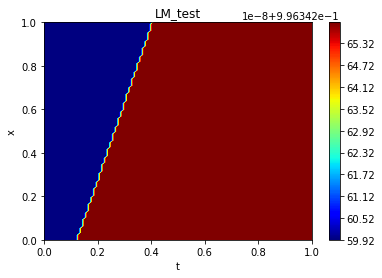

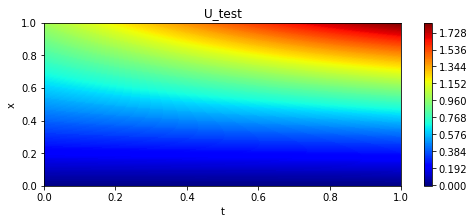

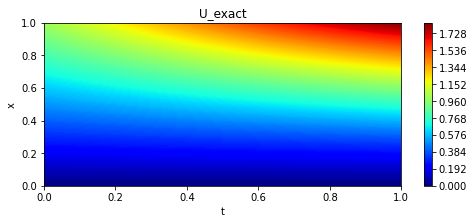

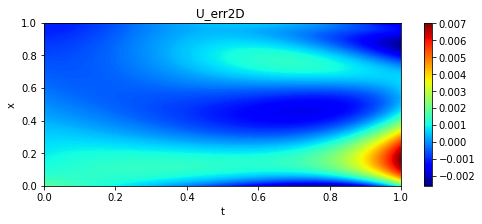

(100, 100) (100, 100) (100, 100) (100, 100)
[[0.       0.      ]
 [0.       0.010101]
 [0.       0.020202]
 [0.       0.030303]
 [0.       0.040404]
 [0.       0.050505]
 [0.       0.060606]
 [0.       0.070707]
 [0.       0.080808]
 [0.       0.090909]
 [0.       0.10101 ]
 [0.       0.111111]
 [0.       0.121212]
 [0.       0.131313]
 [0.       0.141414]
 [0.       0.151515]
 [0.       0.161616]
 [0.       0.171717]
 [0.       0.181818]
 [0.       0.191919]
 [0.       0.20202 ]
 [0.       0.212121]
 [0.       0.222222]
 [0.       0.232323]
 [0.       0.242424]
 [0.       0.252525]
 [0.       0.262626]
 [0.       0.272727]
 [0.       0.282828]
 [0.       0.292929]
 [0.       0.30303 ]
 [0.       0.313131]
 [0.       0.323232]
 [0.       0.333333]
 [0.       0.343434]
 [0.       0.353535]
 [0.       0.363636]
 [0.       0.373737]
 [0.       0.383838]
 [0.       0.393939]
 [0.       0.40404 ]
 [0.       0.414141]
 [0.       0.424242]
 [0.       0.434343]
 [0.       0.444444]
 [0.       

 [1.       1.      ]] [[0.996343 0.996343 0.996343 0.996343 0.996343 0.996343 0.996343 0.996343
  0.996343 0.996343 0.996343 0.996343 0.996343 0.996343 0.996343 0.996343
  0.996343 0.996343 0.996343 0.996343 0.996343 0.996343 0.996343 0.996343
  0.996343 0.996343 0.996343 0.996343 0.996343 0.996343 0.996343 0.996343
  0.996343 0.996343 0.996343 0.996343 0.996343 0.996343 0.996343 0.996343
  0.996343 0.996343 0.996343 0.996343 0.996343 0.996343 0.996343 0.996343
  0.996343 0.996343 0.996343 0.996343 0.996343 0.996343 0.996343 0.996343
  0.996343 0.996343 0.996343 0.996343 0.996343 0.996343 0.996343 0.996343
  0.996343 0.996343 0.996343 0.996343 0.996343 0.996343 0.996343 0.996343
  0.996343 0.996343 0.996343 0.996343 0.996343 0.996343 0.996343 0.996343
  0.996343 0.996343 0.996343 0.996343 0.996343 0.996343 0.996343 0.996343
  0.996343 0.996343 0.996343 0.996343 0.996343 0.996343 0.996343 0.996343
  0.996343 0.996343 0.996343 0.996343]
 [0.996343 0.996343 0.996343 0.996343 0.996343 0.99

  0.996343 0.996343 0.996343 0.996343]] [[ 1.853019e-03  1.183608e-02  2.183163e-02  3.183860e-02  4.185584e-02
   5.188221e-02  6.191692e-02  7.195905e-02  8.200771e-02  9.206206e-02
   1.021214e-01  1.121851e-01  1.222524e-01  1.323228e-01  1.423956e-01
   1.524703e-01  1.625466e-01  1.726238e-01  1.827020e-01  1.927806e-01
   2.028590e-01  2.129377e-01  2.230158e-01  2.330934e-01  2.431703e-01
   2.532465e-01  2.633217e-01  2.733962e-01  2.834697e-01  2.935421e-01
   3.036137e-01  3.136842e-01  3.237539e-01  3.338229e-01  3.438910e-01
   3.539586e-01  3.640257e-01  3.740921e-01  3.841582e-01  3.942241e-01
   4.042899e-01  4.143556e-01  4.244214e-01  4.344874e-01  4.445539e-01
   4.546204e-01  4.646876e-01  4.747553e-01  4.848236e-01  4.948927e-01
   5.049627e-01  5.150333e-01  5.251049e-01  5.351775e-01  5.452509e-01
   5.553252e-01  5.654005e-01  5.754766e-01  5.855539e-01  5.956319e-01
   6.057107e-01  6.157904e-01  6.258708e-01  6.359518e-01  6.460335e-01
   6.561156e-01  6.66198

   1.744090e+00  1.767993e+00  1.791790e+00  1.815442e+00  1.838903e+00]] [[ 1.853019e-03  1.735072e-03  1.629611e-03  1.535566e-03  1.451801e-03
   1.377157e-03  1.310857e-03  1.251978e-03  1.199625e-03  1.152965e-03
   1.111342e-03  1.073950e-03  1.040313e-03  1.009627e-03  9.814444e-04
   9.551093e-04  9.304433e-04  9.066712e-04  8.837933e-04  8.613624e-04
   8.388421e-04  8.164707e-04  7.935332e-04  7.701784e-04  7.460786e-04
   7.212337e-04  6.954351e-04  6.688915e-04  6.413941e-04  6.127643e-04
   5.834193e-04  5.529120e-04  5.215999e-04  4.895727e-04  4.566812e-04
   4.232532e-04  3.892888e-04  3.547283e-04  3.198102e-04  2.847133e-04
   2.494674e-04  2.141917e-04  1.790054e-04  1.439979e-04  1.094076e-04
   7.496639e-05  4.109138e-05  7.782621e-06 -2.484069e-05 -5.674874e-05
  -8.782233e-05 -1.182105e-04 -1.476449e-04 -1.760661e-04 -2.036528e-04
  -2.303455e-04 -2.560248e-04 -2.809889e-04 -3.047014e-04 -3.276985e-04
  -3.499208e-04 -3.712490e-04 -3.918620e-04 -4.118789e-04 -4.3

In [2]:
def ElasImag(nIter = 100000, print_period = 20000, plot_period = 20000):

    t_range = np.array([a, b])
    x_range = np.array([c, d])

    layers_U = [2, 40, 40, 40,40, 40,1]
    layers_V1 =[2, 40, 40, 40,40, 40,1]
    layers_V2 =[2, 40, 40, 40,40, 40,1]
    layers_V3 =[2, 40, 40, 40,40, 40,1]
    layers_V4 =[2, 40, 40, 40,40, 40,1]
    layers_V5 =[2, 40, 40, 40,40, 40,1]
    layers_W1 =[2, 40, 40, 40,40, 40,1]
    layers_W2 =[2, 40, 40, 40,40, 40,1]
    layers_W3 =[2, 40, 40, 40,40, 40,1]
    layers_W4 =[2, 40, 40, 40,40, 40,1]
    layers_W5 =[2, 40, 40, 40,40, 40,1]
    layers_LM = [2, 40, 1]
    

    tx, xx, Ux = import_data('U2D.txt')
    
    f = open("loss_record.txt","w")


    figure_path = './Figure/'
    if not os.path.isdir(figure_path):
        os.makedirs(figure_path)

    num_train_tps =5000
    num_test_tps =100

    # Create the model
    model = PhysicsInformedNN(layers_U, layers_V1,layers_V2,layers_V3,layers_V4,layers_V5, layers_W1,layers_W2,layers_W3,layers_W4,layers_W5,layers_LM,x_range,t_range, f, num_train_tps)

    it_array = []
    loss_array = []
    losses_array = []

    start_time = time.time()

    for it in range(1, nIter+1):
        loss, losses = model.train( tx,xx, Ux, it, it%print_period==0)
        if (it%print_period==0):
            loss_array.append(loss)
            losses_array.append(losses)
            it_array.append(it)
            dt = time.time() - start_time
            print('Time: ', dt)
            start_time = time.time()
            if (it % plot_period == 0 or it == print_period):
                print("Result Plotted...")   
                X_test, U_test, V1_test, V2_test, V3_test,V4_test,V5_test,W1_test,W2_test,W3_test,W4_test,W5_test,LM_test, f_test,e1_test,e2_test, e3_test,e4_test, e5_test,e6_test, e7_test,e8_test, e9_test,e10_test= model.test(num_test_tps)
                # print(X_test,X_test.shape)
                # print(U_test.shape)
                U_exact = X_test[:,1:]+X_test[:,1:] * np.sin(X_test[:, 0:1] * X_test[:, 1:])
                L2error = np.linalg.norm(U_test- U_exact , 2) / np.linalg.norm(U_exact , 2)
                LM_exact = 1 * np.ones(LM_test.shape)
                l2LMerror = np.linalg.norm(LM_test - LM_exact, 2) / np.linalg.norm(LM_exact, 2)
                print('L2 error: ', L2error)   
                print('L2LM error: ', l2LMerror)
                figtopic = 'LM_test'
                t2D = np.reshape(X_test[:, 0:1], [num_test_tps, num_test_tps])
                x2D = np.reshape(X_test[:, 1:], [num_test_tps, num_test_tps])
                LM_test2D = np.reshape(LM_test, [num_test_tps, num_test_tps])
                cs = plt.contourf(t2D,x2D , LM_test2D, 300, cmap=plt.cm.jet)
                plt.colorbar(cs)
                plt.xlabel('t')
                plt.ylabel('x')
                plt.title(figtopic)
                plt.show()
                plt.figure(figsize=(8, 3))
                figtopic = 'U_test'
                t2D = np.reshape(X_test[:, 0:1], [num_test_tps, num_test_tps])
                x2D = np.reshape(X_test[:, 1:], [num_test_tps, num_test_tps])
                U_test2D = np.reshape(U_test, [num_test_tps, num_test_tps])
                cs = plt.contourf(t2D,x2D , U_test2D, 300, cmap=plt.cm.jet)
                plt.colorbar(cs)
                plt.xlabel('t')
                plt.ylabel('x')
                plt.title(figtopic)
                plt.show()
                plt.figure(figsize=(8, 3))
                figtopic = 'U_exact'
                t2D = np.reshape(X_test[:, 0:1], [num_test_tps, num_test_tps])
                x2D = np.reshape(X_test[:, 1:], [num_test_tps, num_test_tps])
                U_exact =X_test[:,1:]+X_test[:,1:] * np.sin(X_test[:, 0:1] * X_test[:, 1:])
                U_exact2D = np.reshape(U_exact, [num_test_tps, num_test_tps])
                cs = plt.contourf(t2D,x2D ,U_exact2D, 300, cmap=plt.cm.jet)
                plt.colorbar(cs)
                plt.xlabel('t')
                plt.ylabel('x')
                plt.title(figtopic)
                plt.show()
                plt.figure(figsize=(8, 3))
                figtopic = 'U_err2D '
                t2D = np.reshape(X_test[:, 0:1], [num_test_tps, num_test_tps])
                x2D = np.reshape(X_test[:, 1:], [num_test_tps, num_test_tps])
                U_exact =X_test[:,1:]+X_test[:,1:] * np.sin(X_test[:, 0:1] * X_test[:, 1:])
                U_exact2D = np.reshape(U_exact, [num_test_tps, num_test_tps])
                U_test2D = np.reshape(U_test, [num_test_tps, num_test_tps])
                U_err2D = U_test2D-U_exact2D
                cs = plt.contourf(t2D,x2D , U_err2D, 300, cmap=plt.cm.jet)
                plt.colorbar(cs)
                plt.xlabel('t')
                plt.ylabel('x')
                plt.title(figtopic)
                plt.show()
                print(t2D.shape,x2D.shape, U_exact2D.shape,U_test2D .shape)
                print(X_test,LM_test2D, U_test2D,U_err2D)
                
ElasImag(nIter =20000, print_period =5000, plot_period =5000)